In [1]:
!pip install statsmodels

/bin/bash: /glob/intel-python/python2/bin/pip: /glob/intel-python/versions/2018u2/intelpython2/bin/python: bad interpreter: No such file or directory


In [2]:
import statsmodels.api as sm

In [3]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

/bin/bash: /glob/intel-python/python2/bin/pip: /glob/intel-python/versions/2018u2/intelpython2/bin/python: bad interpreter: No such file or directory


In [4]:
pd.options.display.max_columns=100 # to see columns 

In [5]:
df_store = pd.read_csv('stores.csv') #store data

In [6]:
df_train = pd.read_csv('train.csv') # train set

In [7]:
df_features = pd.read_csv('features.csv') #external information

In [8]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [12]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) #duplicate column

In [13]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename column

In [14]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [15]:
df.shape

(421570, 16)

In [16]:
df['Store'].nunique() # how many stores

45

In [17]:
df['Dept'].nunique() # how many departments

81

In [18]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

In [19]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [20]:
df = df.loc[df['Weekly_Sales'] >0] # we can ignore the incorrect negetive values as they are less than 1%

In [21]:
df.shape

(420212, 16)

In [22]:
pd.concat([df['Date'].head(3),df['Date'].tail(3)])  # to see the range of dates in the dataset

0         2010-02-05
1         2010-02-05
2         2010-02-05
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

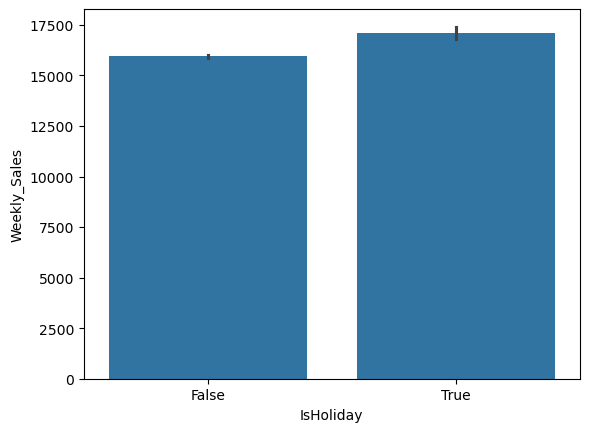

In [23]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [24]:
df_holiday = df.loc[df['IsHoliday']==True] #Find all holidays
df_holiday['Date'].unique() # Print all unique holidays

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [25]:
df_not_holiday = df.loc[df['IsHoliday']==False] #Find all days which are not holidays
df_not_holiday['Date'].unique() # Print all unique normal days

array(['2010-02-05', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02',
       '2010-04-09', '2010-04-16', '2010-04-23', '2010-04-30',
       '2010-05-07', '2010-05-14', '2010-05-21', '2010-05-28',
       '2010-06-04', '2010-06-11', '2010-06-18', '2010-06-25',
       '2010-07-02', '2010-07-09', '2010-07-16', '2010-07-23',
       '2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20',
       '2010-08-27', '2010-09-03', '2010-09-17', '2010-09-24',
       '2010-10-01', '2010-10-08', '2010-10-15', '2010-10-22',
       '2010-10-29', '2010-11-05', '2010-11-12', '2010-11-19',
       '2010-12-03', '2010-12-10', '2010-12-17', '2010-12-24',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-18', '2011-02-25', '2011-03-04',
       '2011-03-11', '2011-03-18', '2011-03-25', '2011-04-01',
       '2011-04-08', '2011-04-15', '2011-04-22', '2011-04-29',
       '2011-05-06', '2011-05-13', '2011-05-20', '2011-

In [26]:
df_not_holiday['Date'].unique().shape

(133,)

In [27]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

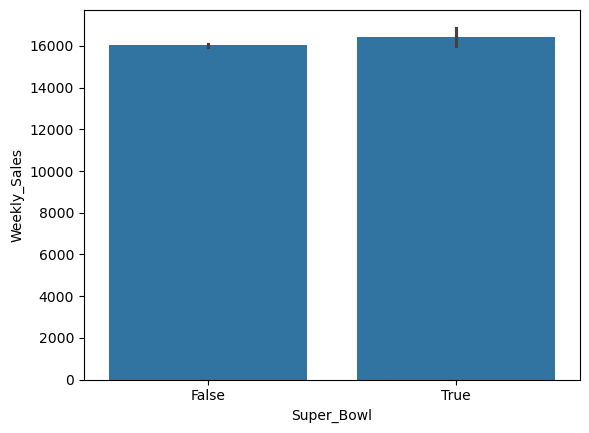

In [28]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super Bowl vs not-Super Bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

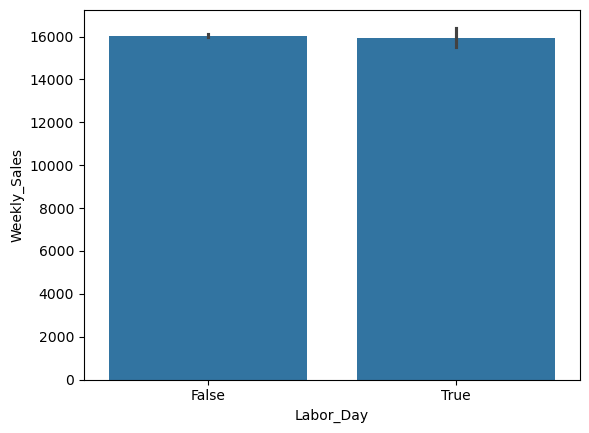

In [29]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor Day holiday vs not-Labor Day

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

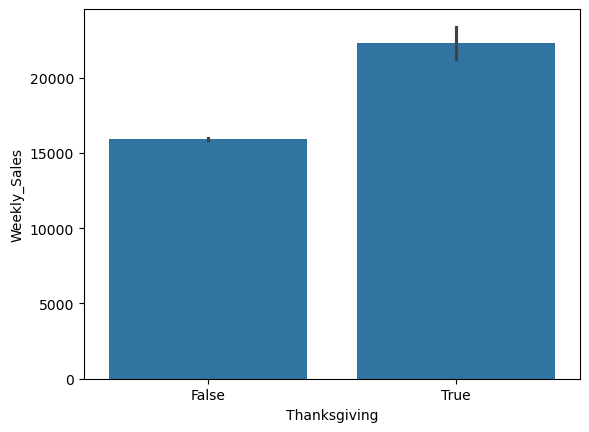

In [30]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-Thanksgiving

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

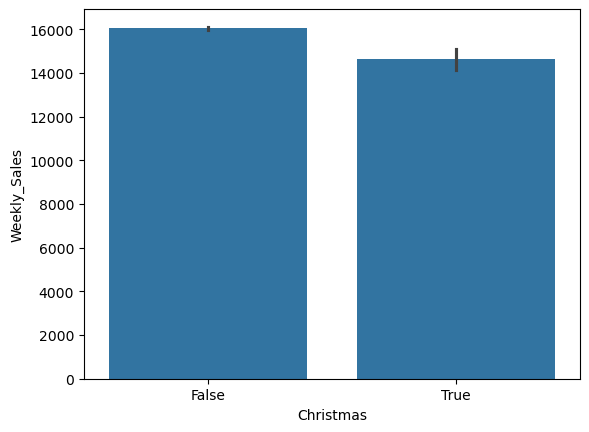

In [31]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

In [32]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [33]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [34]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [35]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [36]:
df.loc[df['Store']==1]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1,94,2012-10-26,60278.73,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315,False,False,False,False
10240,1,95,2012-10-26,117375.38,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315,False,False,False,False
10241,1,96,2012-10-26,36851.92,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315,False,False,False,False
10242,1,97,2012-10-26,32830.52,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315,False,False,False,False


In [37]:
df.loc[df['Store']==2]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
10244,2,1,2010-02-05,35034.06,False,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,A,202307,False,False,False,False
10245,2,2,2010-02-05,74661.16,False,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,A,202307,False,False,False,False
10246,2,3,2010-02-05,16873.20,False,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,A,202307,False,False,False,False
10247,2,4,2010-02-05,47681.96,False,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,A,202307,False,False,False,False
10248,2,5,2010-02-05,34025.45,False,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,A,202307,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20477,2,94,2012-10-26,71138.52,False,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,A,202307,False,False,False,False
20478,2,95,2012-10-26,138018.99,False,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,A,202307,False,False,False,False
20479,2,96,2012-10-26,38391.46,False,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,A,202307,False,False,False,False
20480,2,97,2012-10-26,40710.09,False,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,A,202307,False,False,False,False


In [38]:
df.loc[df['Store']==3]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
20482,3,1,2010-02-05,6453.58,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392,False,False,False,False
20483,3,2,2010-02-05,17566.72,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392,False,False,False,False
20484,3,3,2010-02-05,4710.29,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392,False,False,False,False
20485,3,4,2010-02-05,8495.10,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392,False,False,False,False
20486,3,5,2010-02-05,15051.48,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29513,3,92,2012-10-26,9835.20,False,74.66,3.506,370.99,6.35,4.0,5.94,180.07,226.987364,6.034,B,37392,False,False,False,False
29514,3,94,2012-10-26,313.78,False,74.66,3.506,370.99,6.35,4.0,5.94,180.07,226.987364,6.034,B,37392,False,False,False,False
29515,3,95,2012-10-26,17210.73,False,74.66,3.506,370.99,6.35,4.0,5.94,180.07,226.987364,6.034,B,37392,False,False,False,False
29516,3,96,2012-10-26,4654.40,False,74.66,3.506,370.99,6.35,4.0,5.94,180.07,226.987364,6.034,B,37392,False,False,False,False


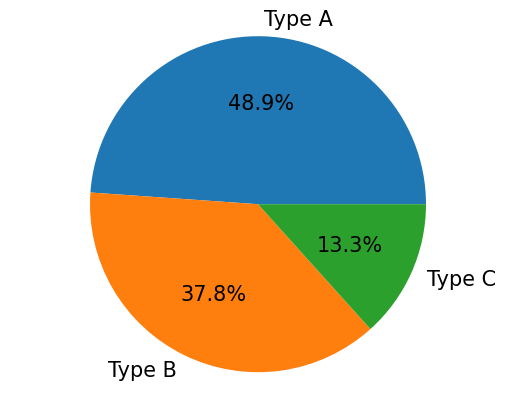

In [39]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie chart
plt.axis('equal')

plt.show()

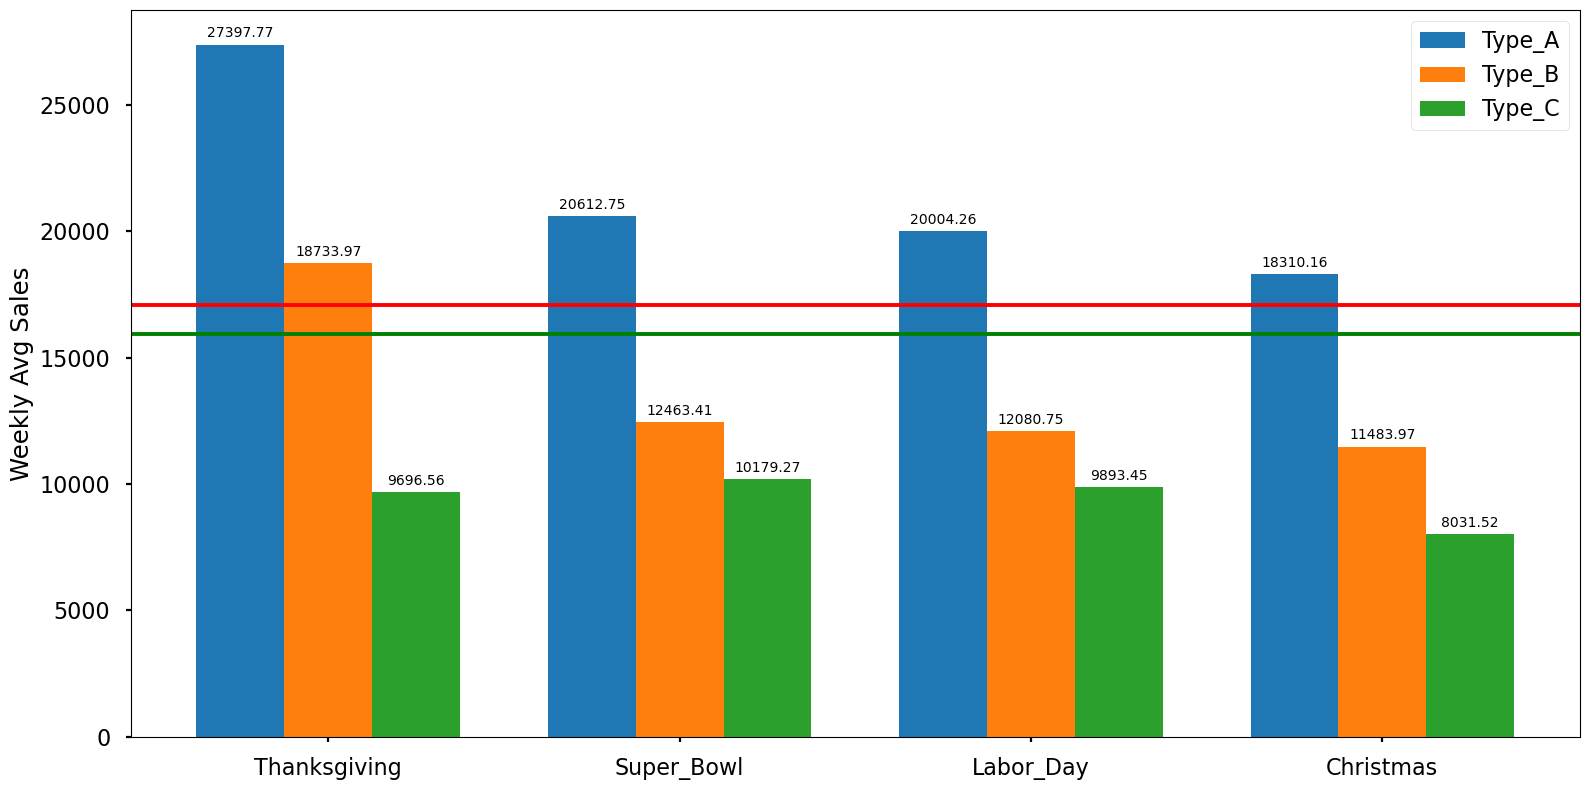

In [40]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects): # Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [41]:
df.sort_values(by='Weekly_Sales',ascending =False).head(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


In [42]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5) #check the top 5 sales days and see if it coincides with the bar chart

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


In [43]:
# we can see that the top 5 sales days all lie on thanksgiving

In [44]:
df_store.groupby('Type').describe()['Size'].round(2) # See the relation between size of stores and sales

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


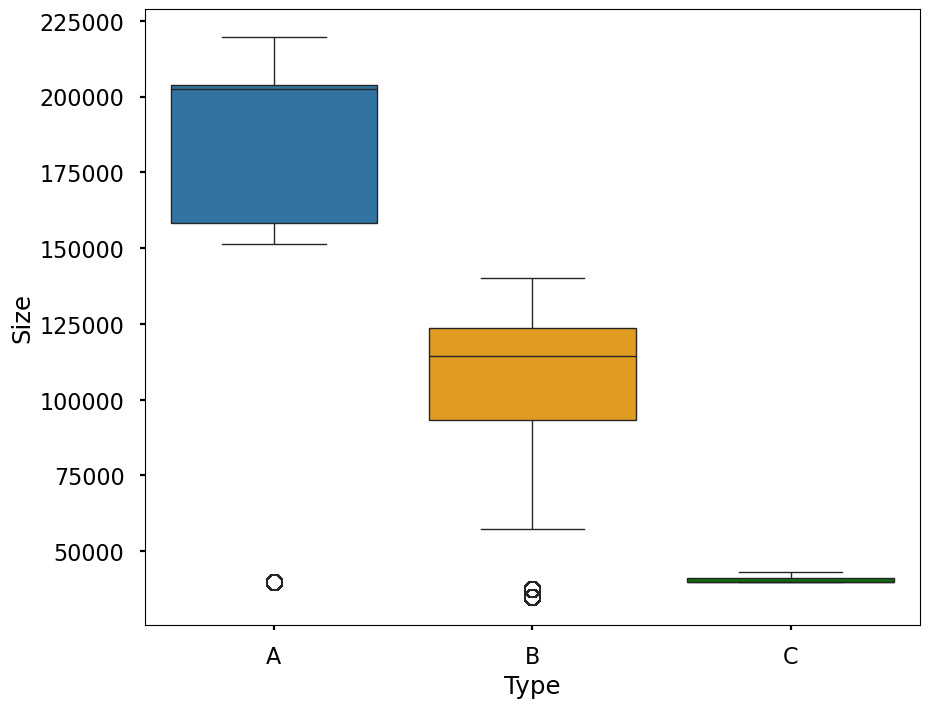

In [45]:
plt.figure(figsize=(10,8))
colours = ["#1f77b4", "orange", "green"]
fig = sns.boxplot(x='Type',y='Size',data = df, palette = colours)

In [46]:
#Hence we see that larger stores have more sales . This is in line with the above findings that size of stores A > B > C

In [47]:
df.isna().sum() # Find how many values of markdowns are 0

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [48]:
df = df.fillna(0) # Since the markdowns are null we can assume it as no markdowns hence as 0

In [49]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [50]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


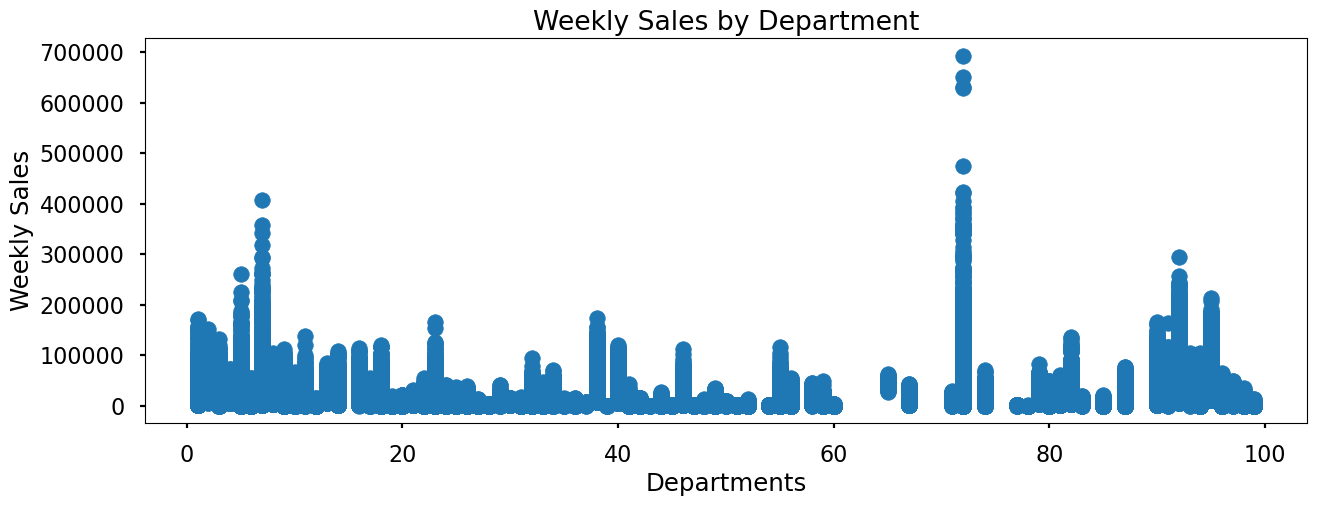

In [51]:
y = df['Weekly_Sales']
x = df['Dept']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

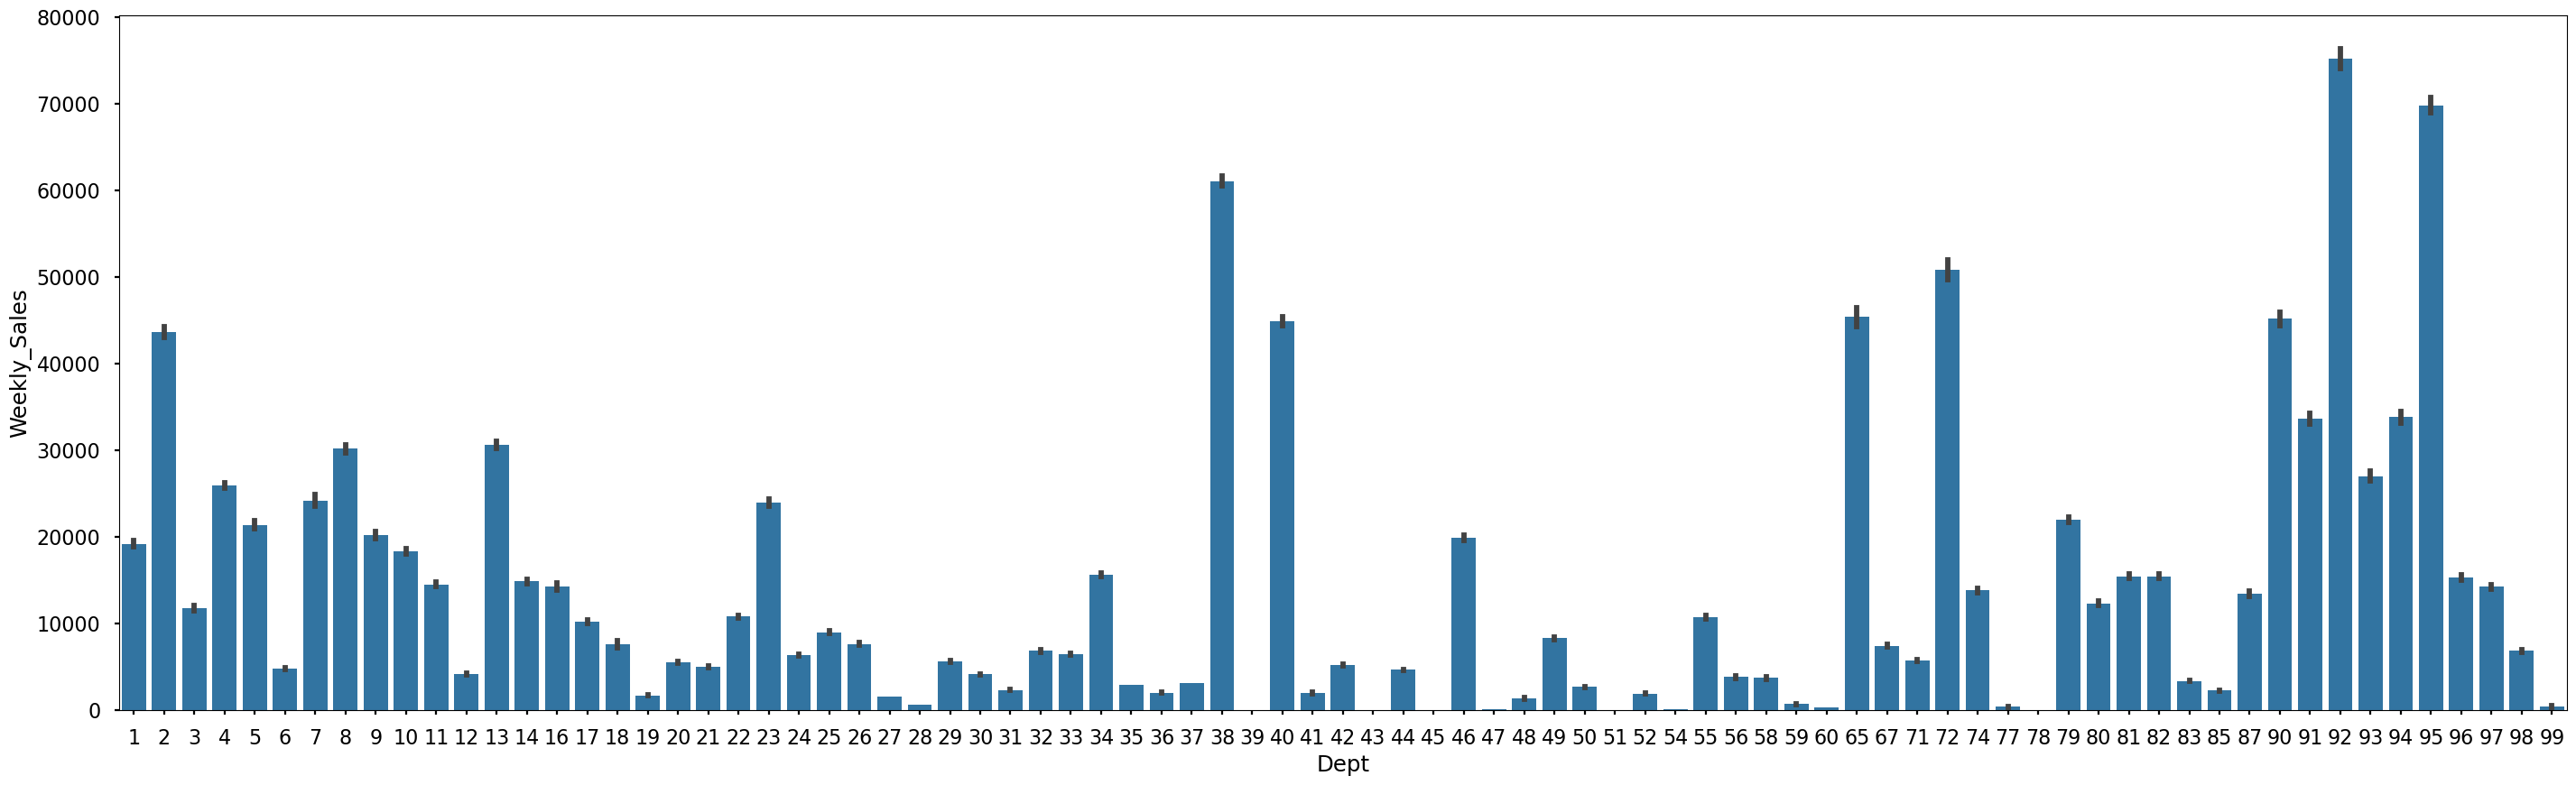

In [52]:
plt.figure(figsize=(35,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

In [53]:
# Hence we can see that some store between 60 and 80 has the highest sales but on taking average store 92 has the highest sales

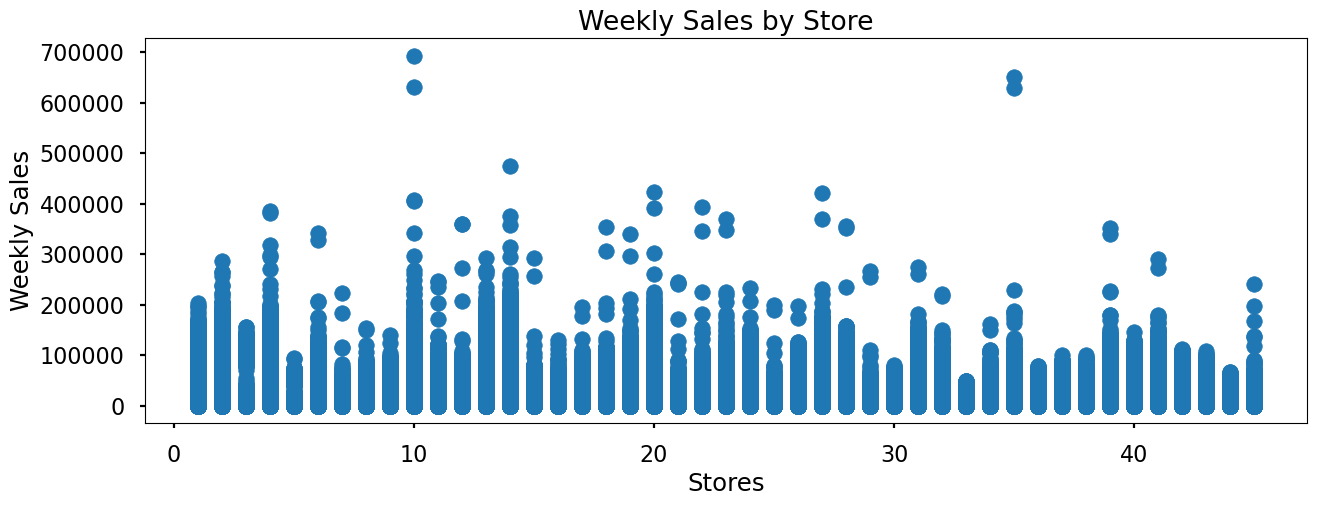

In [54]:
y = df['Weekly_Sales']
x = df['Store']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

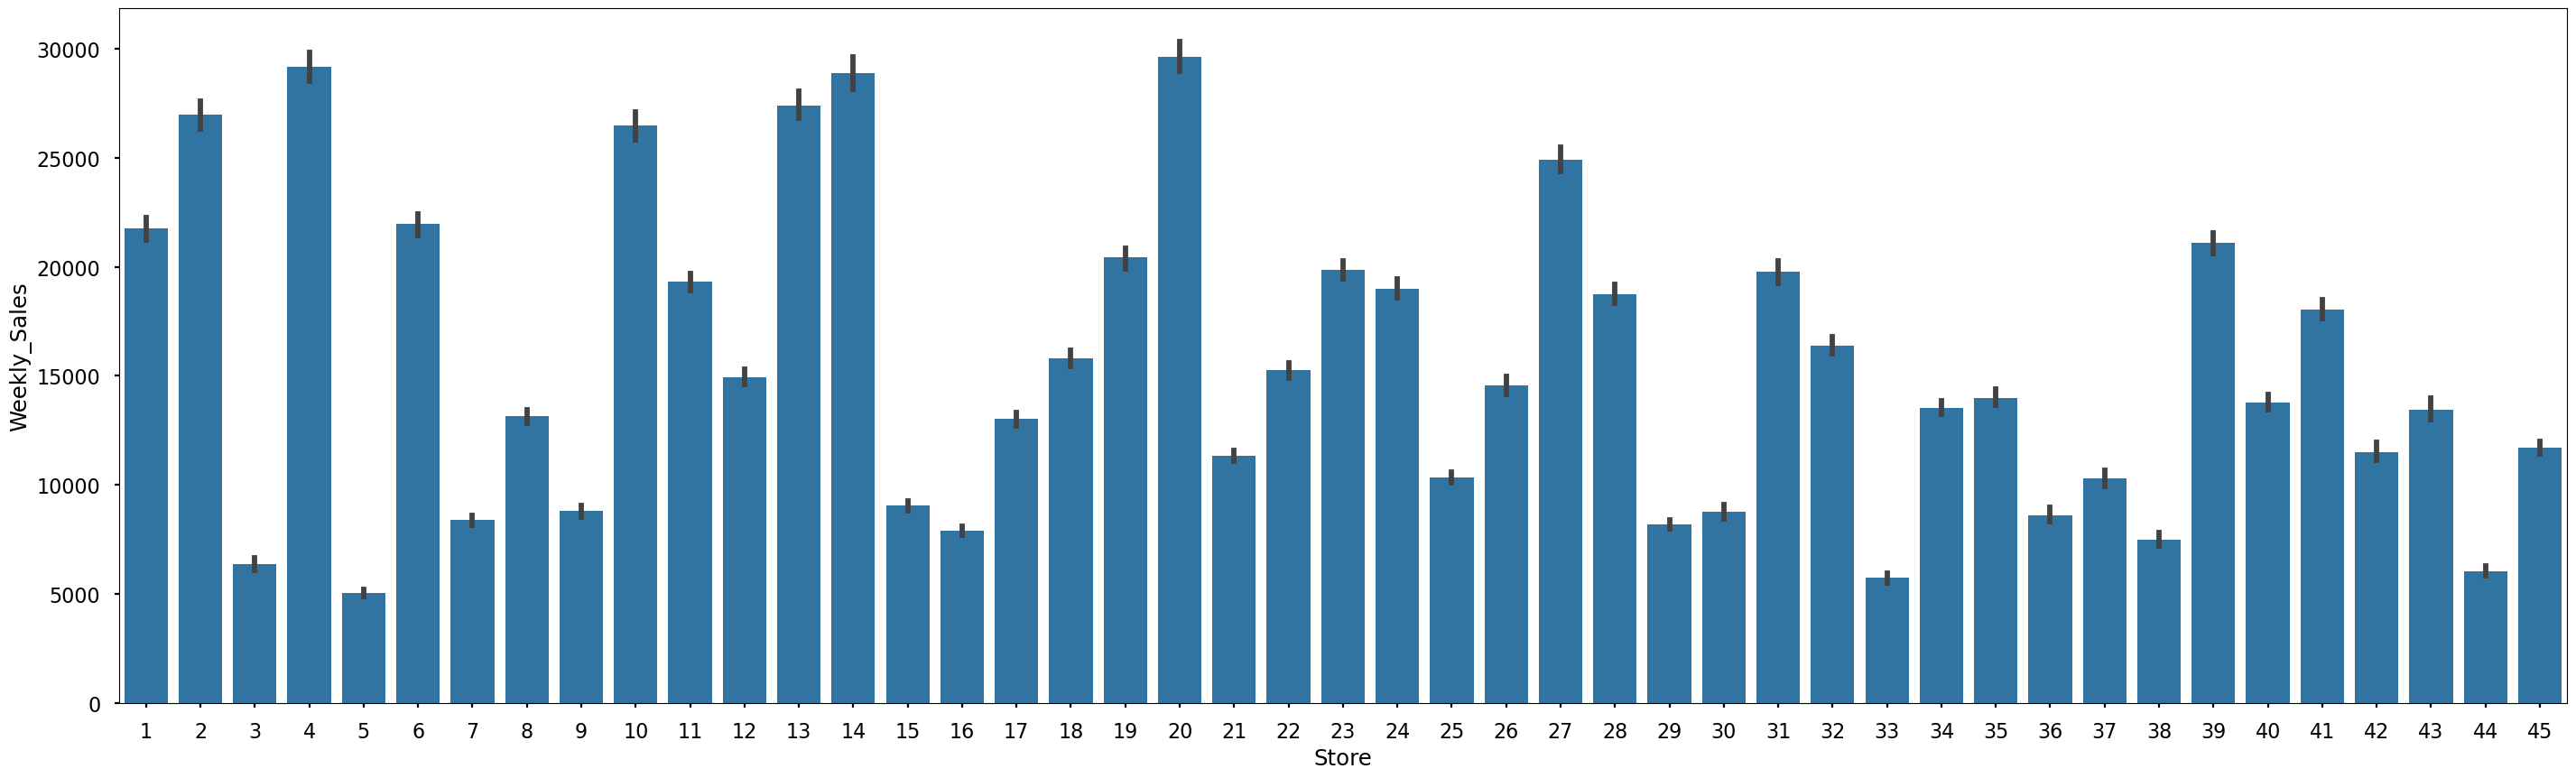

In [55]:
plt.figure(figsize=(35,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [56]:
# We same the same trend that some stores have higher sales but in average the sales of store 20 is the highest followed by 4 and 14

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [58]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [59]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best year for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [60]:
# 2010 has the best yearly sales and Novemeber has the best monthly sales

<Axes: xlabel='month'>

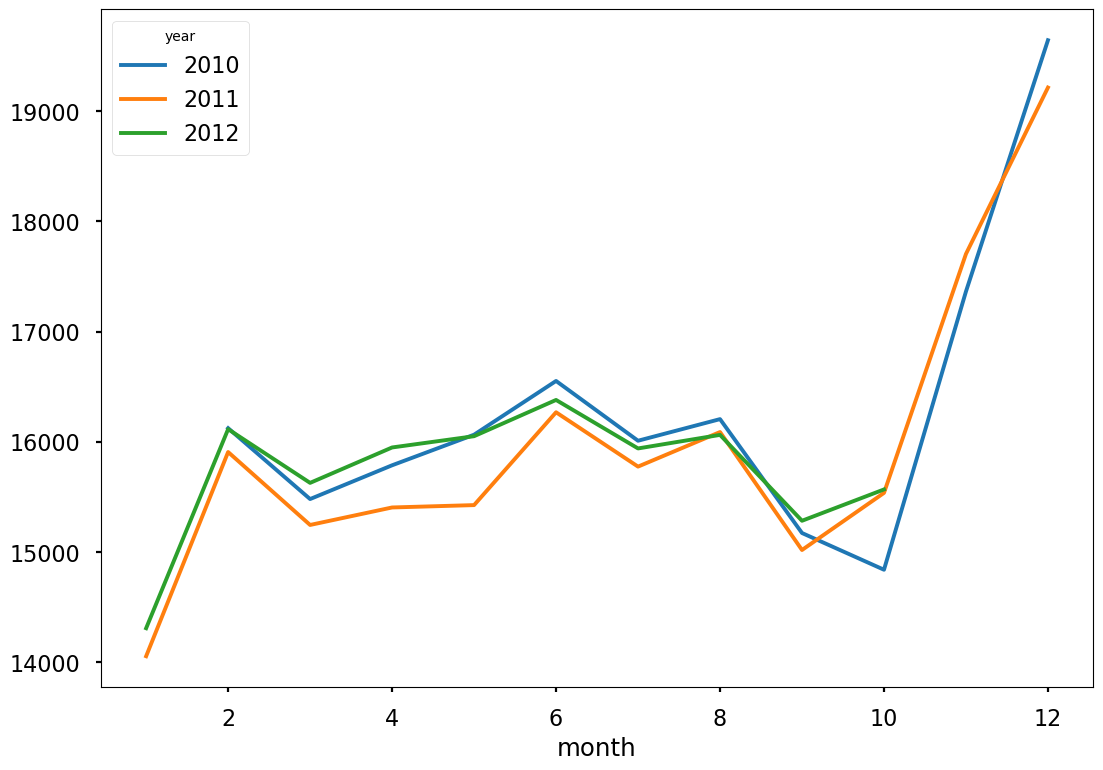

In [61]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

In [62]:
# 2011 Has the lowest sales on average but the data of the last 2 months of 2012 is not available or else it might be more than 2010 considering
# the last 2 months of the year has highest sales

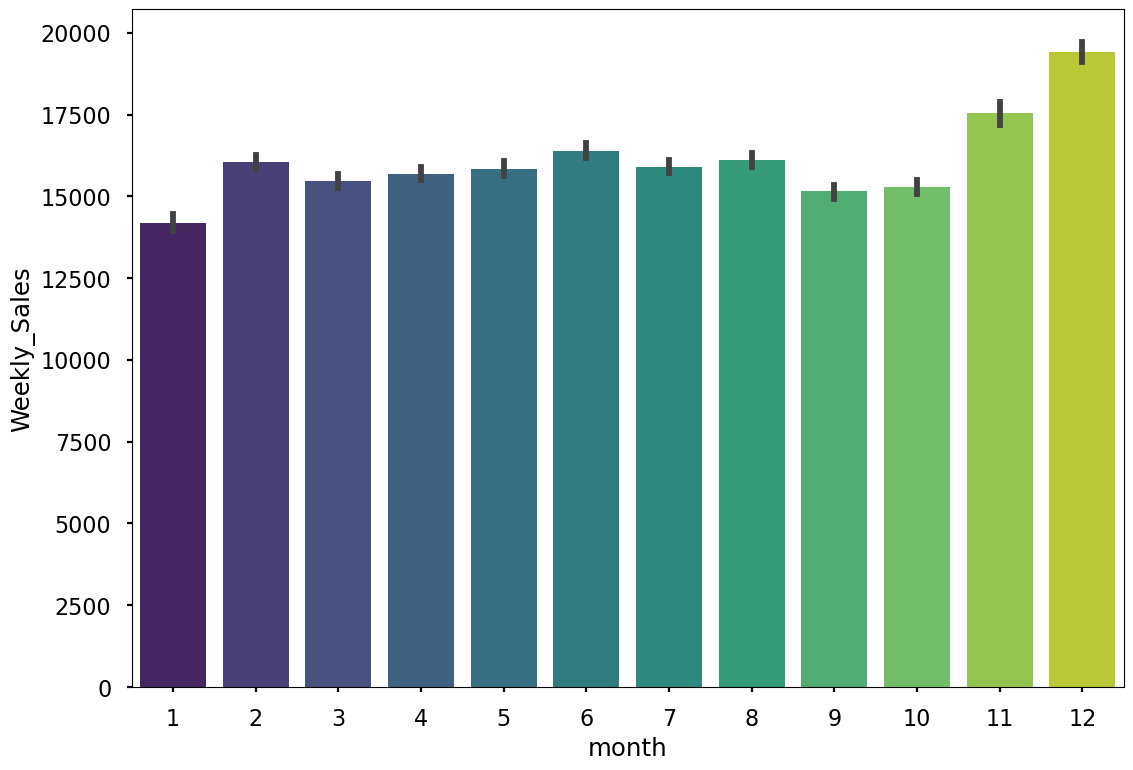

In [63]:
fig = sns.barplot(x='month',y='Weekly_Sales', data = df, palette='viridis')

In [64]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending = False).head(5) # to see the best year for sales

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

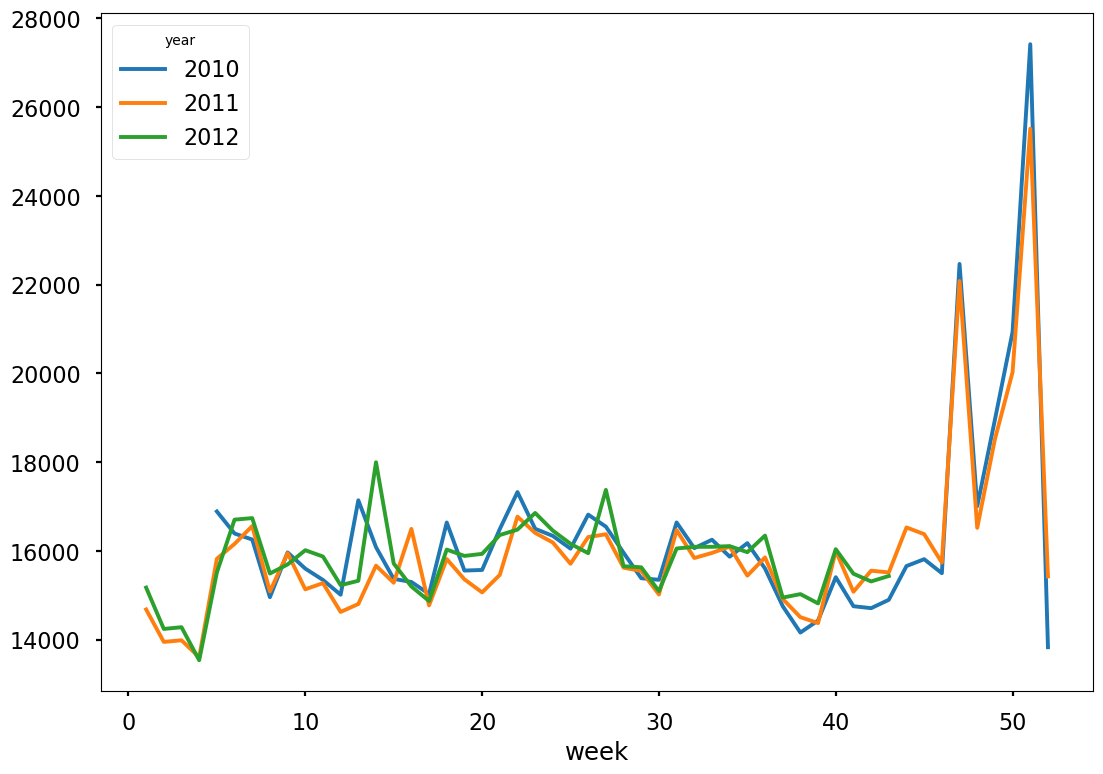

In [65]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

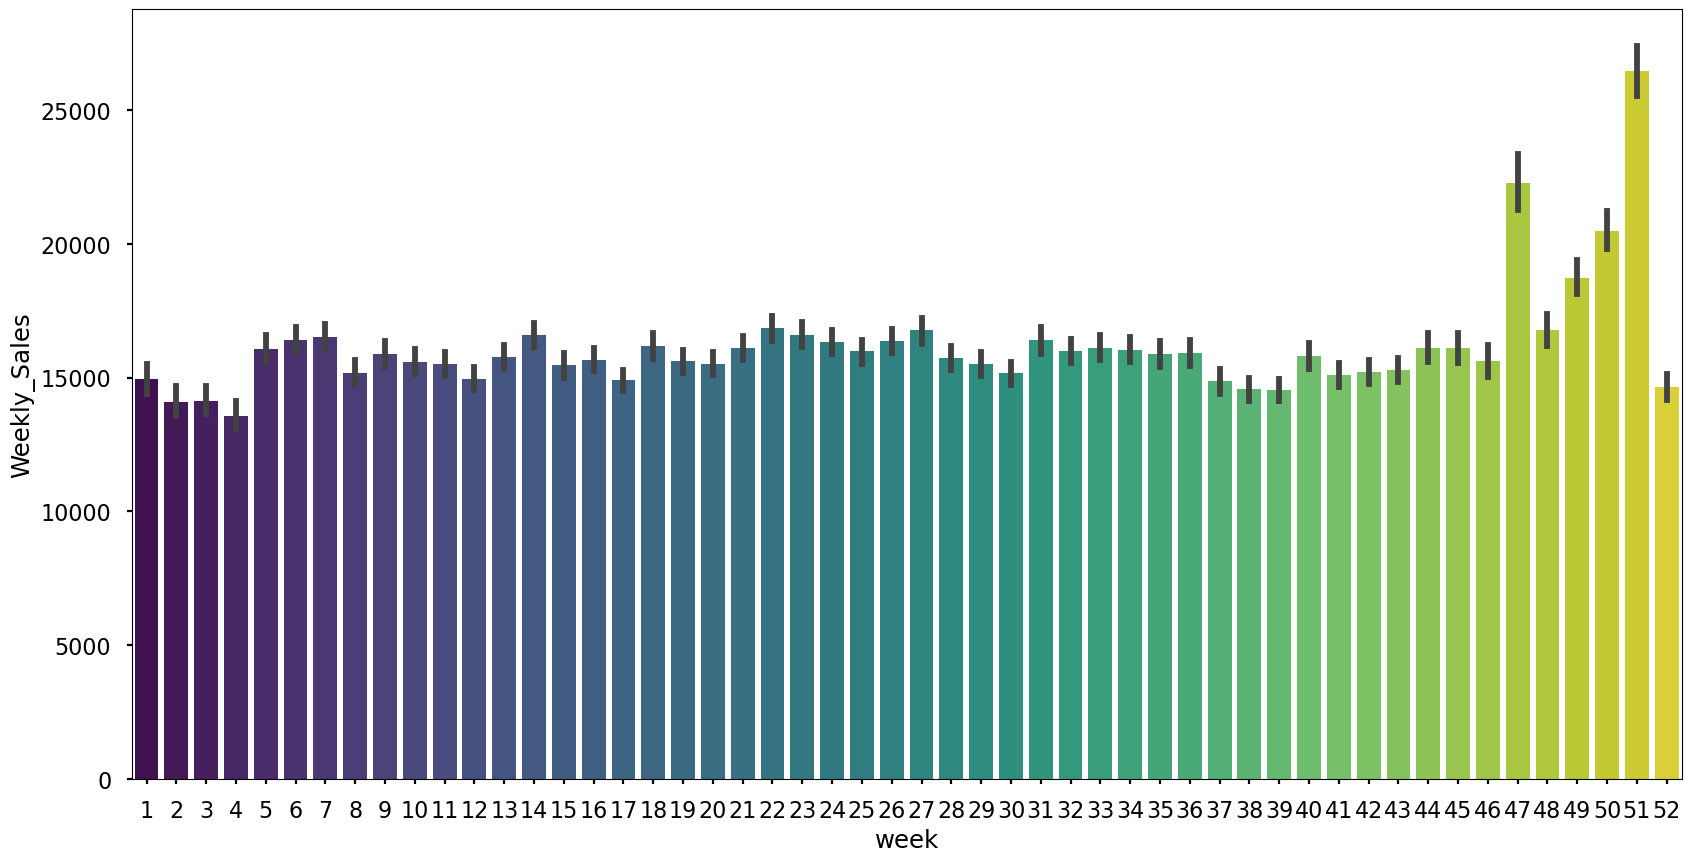

In [66]:
plt.figure(figsize=(20,10))
fig = sns.barplot(x='week',y='Weekly_Sales', data = df, palette='viridis')

In [67]:
# Hence we see that the weeks 47 and 51 have significantly higher sales than the average

<Axes: xlabel='Fuel_Price'>

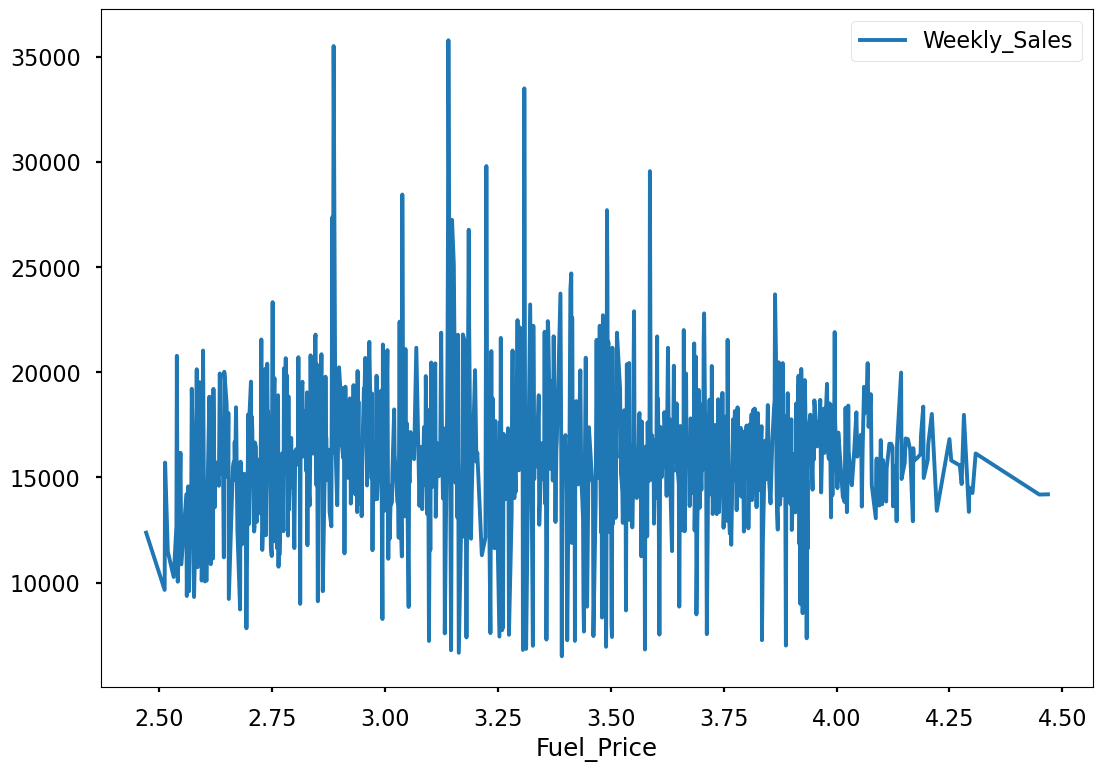

In [68]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index = "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

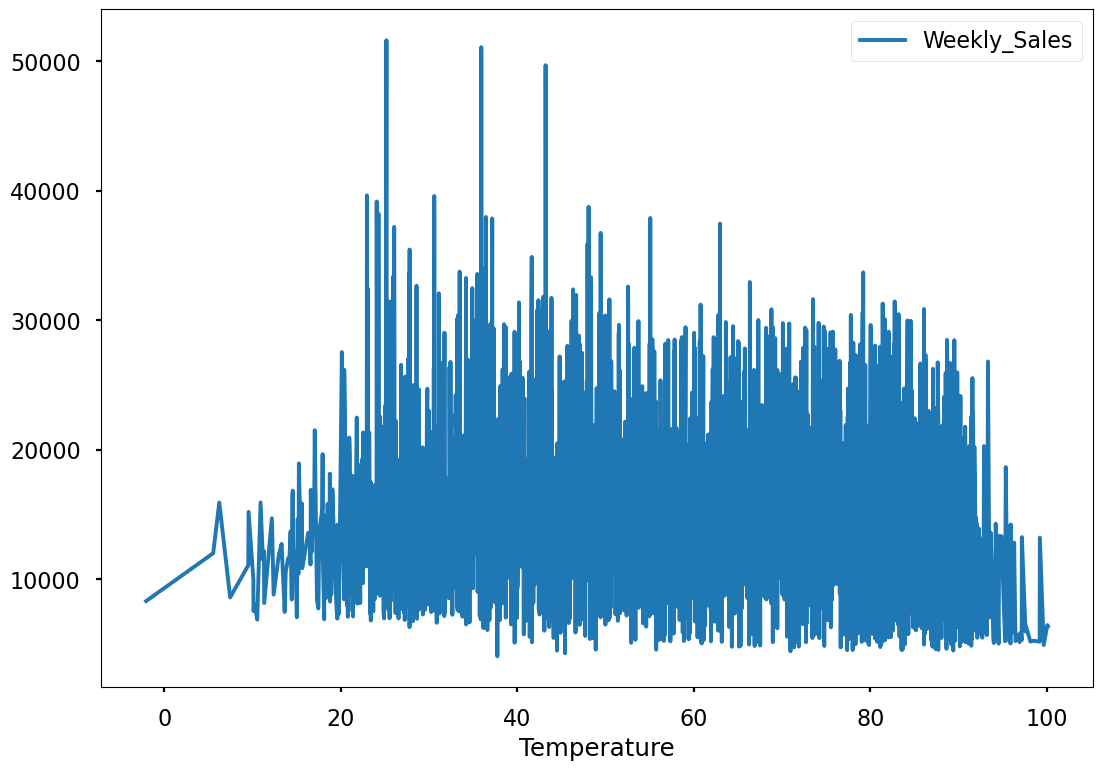

In [69]:
temperature = pd.pivot_table(df, values = "Weekly_Sales", index = "Temperature")
temperature.plot()

<Axes: xlabel='CPI'>

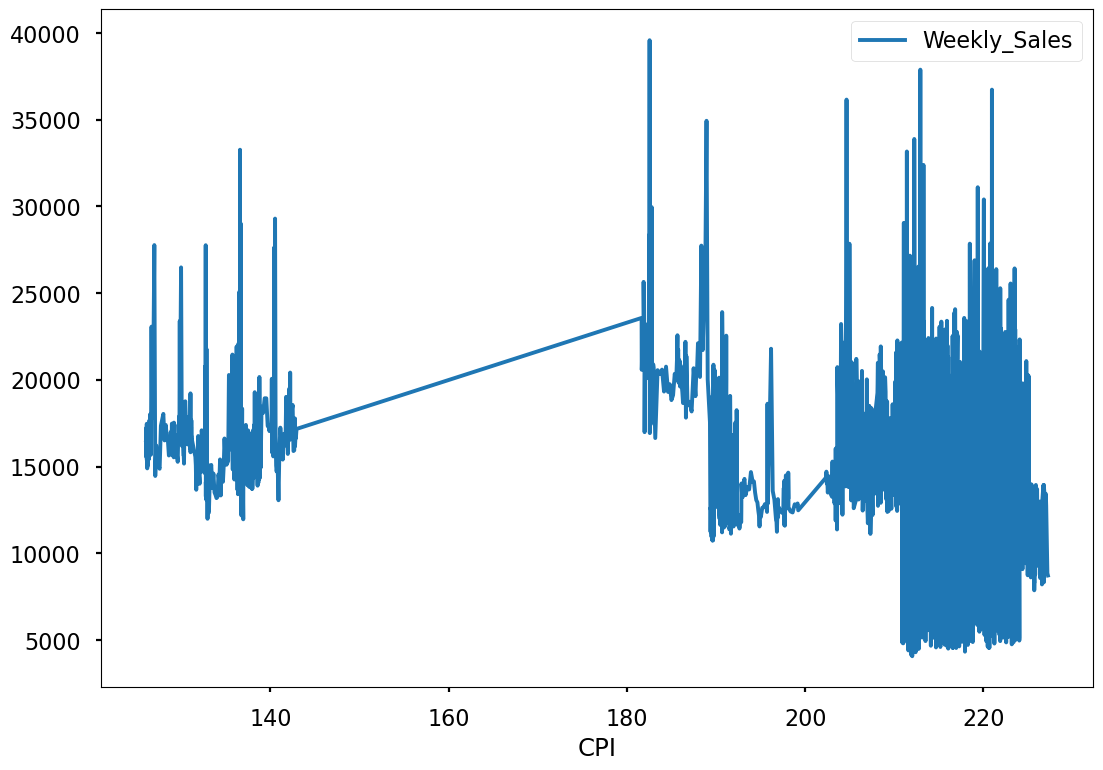

In [70]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index = "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

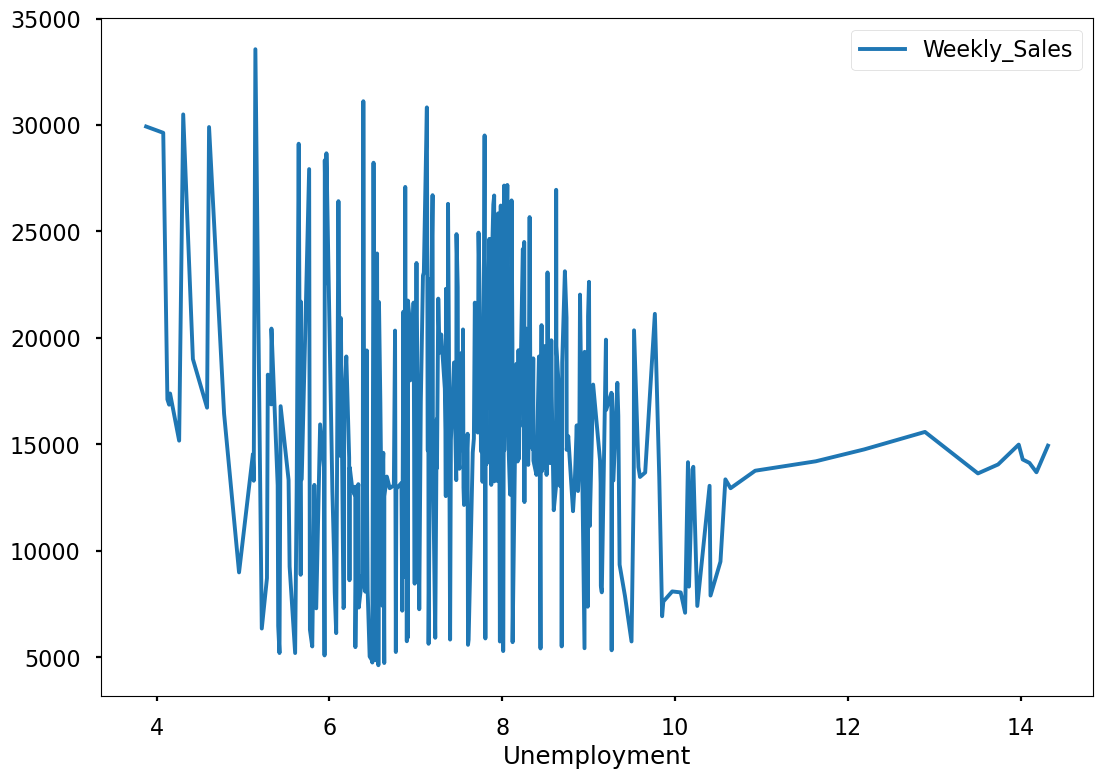

In [71]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [72]:
#Hence we see that there are no major corelations between the 4 ie- Unemployment,CPI,Temperature and Fuel price

In [73]:
df.to_csv('clean_data.csv')

<font size="5">WE HAVE COMPLETED THE PRELIMINARY ANALYSIS OF THE DATA IN THE PROVIDED DATASET AND ARE ABLE TO DRAW A FEW CONCLUSIONS FROM IT.
    
The number of null and below zero values were under 0.5% hence we can remove them from the final dataset
We can merge the datasets and remove the duplicate values
    
There are 45 stores with 81 departments . The stores are of three types A,B,C with A being the biggest and C the smallest. The sales follow   the same trend
    
The sales are higher during holidays with Thanksgiving having the highest impact on sales
    
The year 2010 has the highest sales. 2012 has a similar average but the data of the last 2 months is missing in 2012, the last 2 months are    when maximum sales occurs
    
Christmas days have lower sales than Thanksgiving as people generally prefer to shop the week prior to Christmas
    
Another spike in sales is seen during the end of April to end of May period probably due to the summer break of schools
    
January sales are significantly lesser probably due to people wanting to curb spending after the Christmas holidays
    
Stores 10 and 35 have the highest sales but on average the highest sales are of the Stores 4,14 and 20 closely followed by 2,10 and 13. This    means some areas have higher seasonal sales values
    
Department 72 has significantly higher sales values but on average the order of highest sales is department 92,95,38 and then 72. This implies  that department 72 is a seasonal department with increased demands only during certain periods
    
CPI, temperature, unemployment rate and fuel price have no pattern and hence no general trend when it comes to weekly sales.
</font>

In [74]:
df = pd.read_csv('./clean_data.csv')

In [75]:
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


# Applying the random forest algorithm

In [76]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [77]:
df['Date'] = pd.to_datetime(df['Date'])

In [78]:
df_encoded = df.copy()

In [79]:
type_group = { 'A' : 1, 'B' : 2, 'C' : 3}
df_encoded['Type'] = df_encoded['Type'].replace(type_group) # Change the stores from A,B,C to 1,2,3 for easy use

In [80]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # Change the true or false to 0 or 1

In [81]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int)

In [82]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)

In [83]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)

In [84]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

In [85]:
df_new = df_encoded.copy()

In [86]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

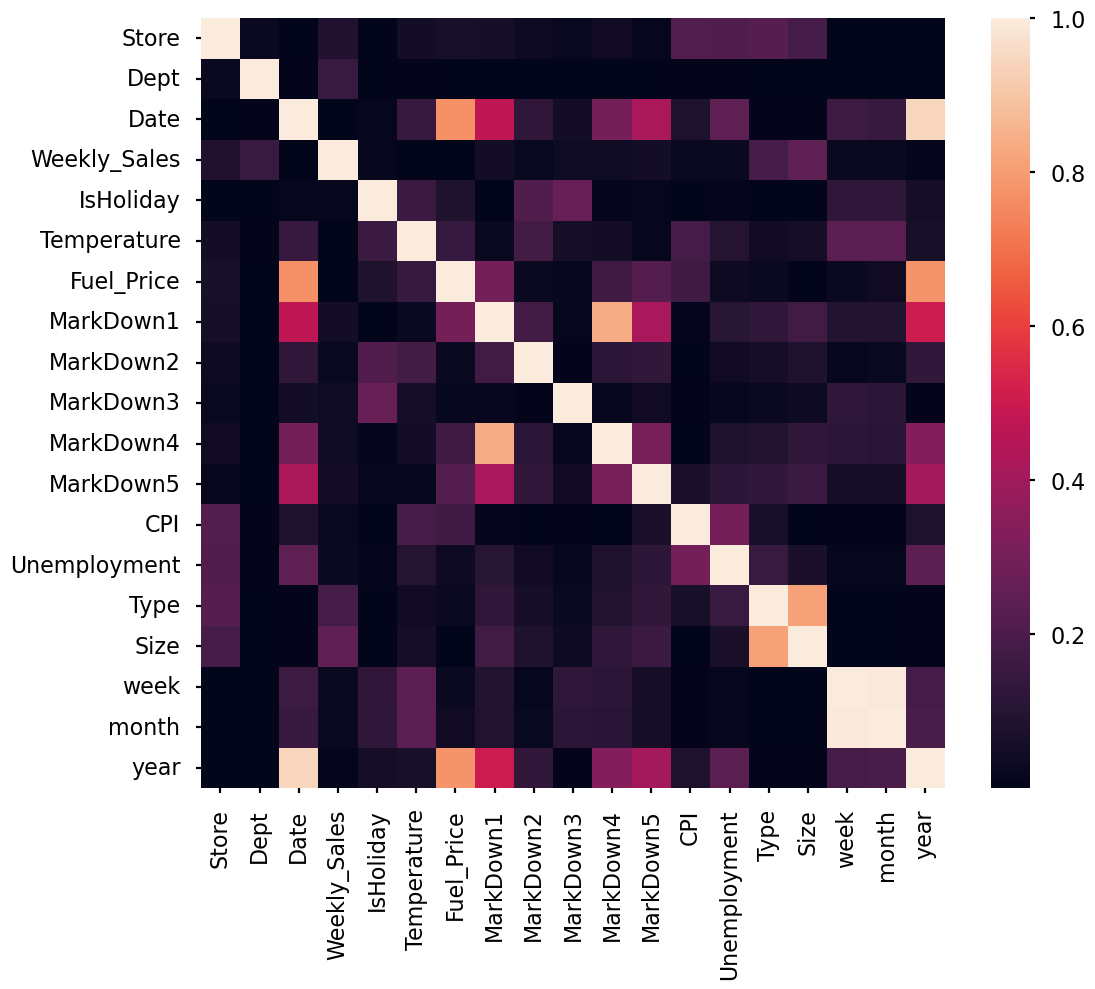

In [87]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

In [88]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

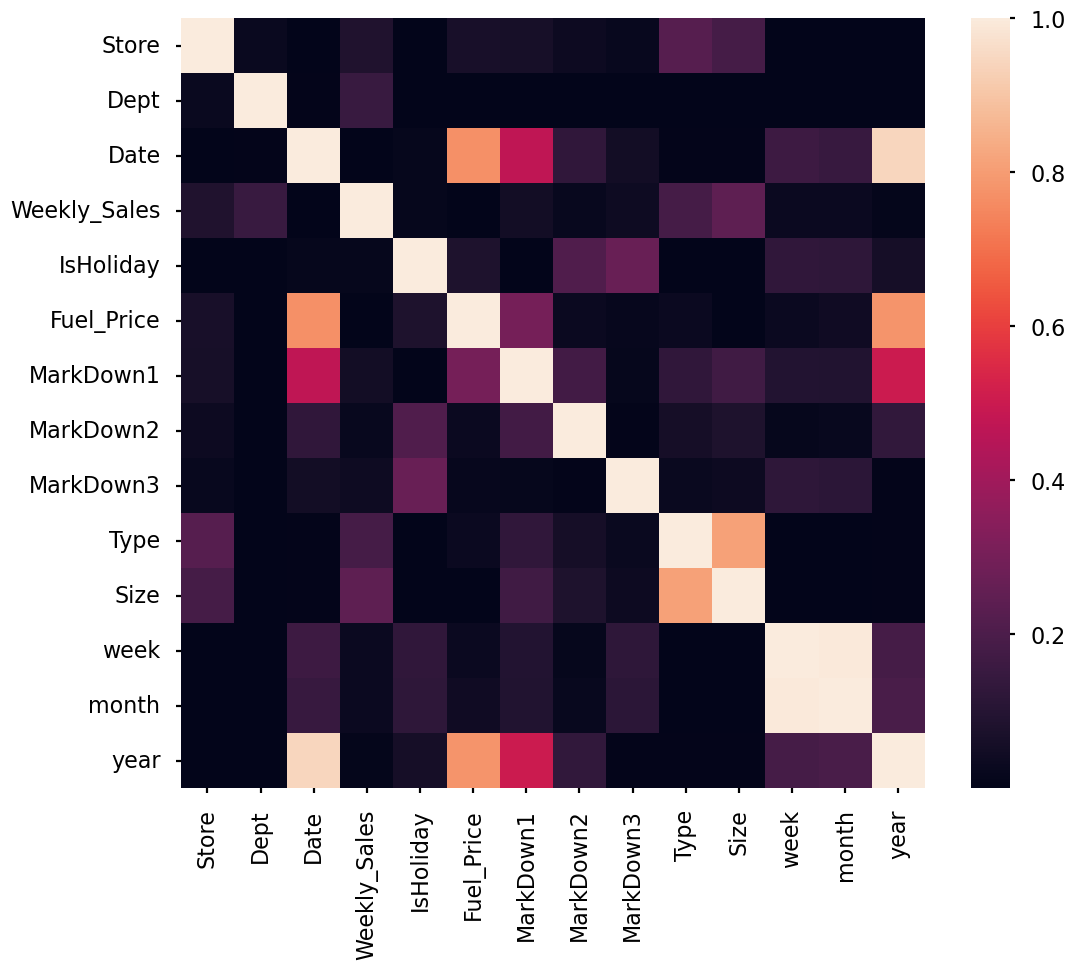

In [89]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

In [90]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

In [91]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [92]:
X = df_new[used_cols] # to keep train and test X values together

In [93]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [94]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [95]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

pipe = make_pipeline(scaler,rf) #making pipe tp use scaler and regressor together

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train) # predictions on train set

y_pred_test = pipe.predict(X_test) # predictions on test set

In [96]:
wmae_test(y_test, y_pred_test)

5850.444413125214

In [97]:
#This is an error of almost 32% Hence we need to further tune the model

In [98]:
X = X.drop(['Date'],axis=1)

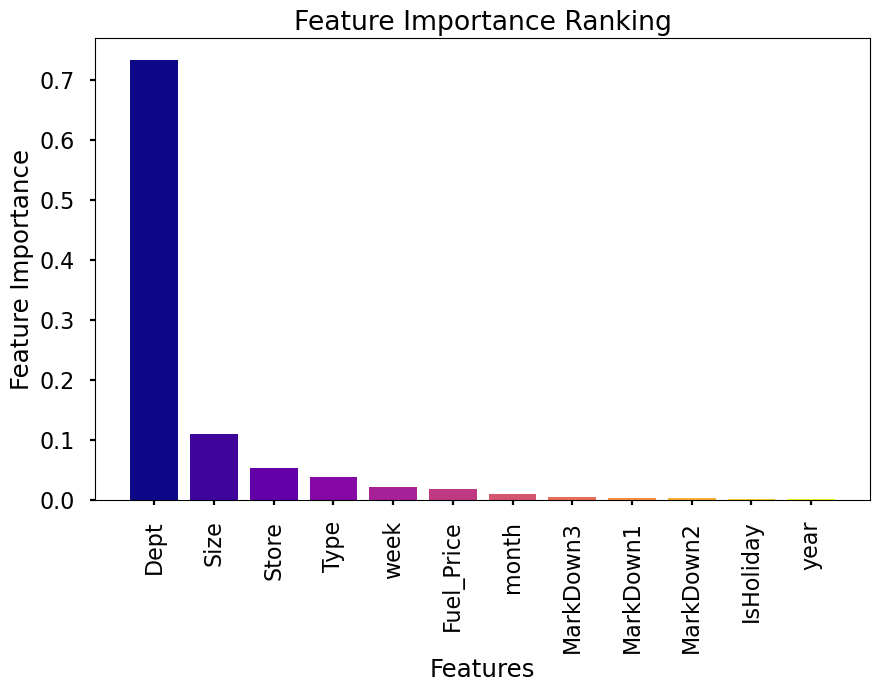

Feature Ranking:
1. Dept: 0.0540 (5.40%)
	Color: [0.050383 0.029803 0.527975 1.      ]
2. Size: 0.7328 (73.28%)
	Color: [0.241396 0.014979 0.610259 1.      ]
3. Store: 0.0022 (0.22%)
	Color: [0.387183 0.001434 0.654177 1.      ]
4. Type: 0.0184 (1.84%)
	Color: [0.523633 0.024532 0.652901 1.      ]
5. week: 0.0034 (0.34%)
	Color: [0.650746 0.125309 0.595617 1.      ]
6. Fuel_Price: 0.0028 (0.28%)
	Color: [0.752312 0.227133 0.513149 1.      ]
7. month: 0.0055 (0.55%)
	Color: [0.836801 0.329105 0.430905 1.      ]
8. MarkDown3: 0.0382 (3.82%)
	Color: [0.907365 0.434524 0.35297  1.      ]
9. MarkDown1: 0.1104 (11.04%)
	Color: [0.963203 0.553865 0.271909 1.      ]
10. MarkDown2: 0.0213 (2.13%)
	Color: [0.991985 0.681179 0.195295 1.      ]
11. IsHoliday: 0.0094 (0.94%)
	Color: [0.986509 0.822401 0.143557 1.      ]
12. year: 0.0015 (0.15%)
	Color: [0.940015 0.975158 0.131326 1.      ]


In [99]:
# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Get the list of feature names
feature_names = X.columns.tolist()

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Sort feature names accordingly
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Define color gradient
colors = plt.cm.plasma(np.linspace(0, 1, len(feature_importances)))

# Plot feature importances with colors
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color=colors)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.show()

# List feature rankings with colors
print("Feature Ranking:")
for rank, (feature, importance, color) in enumerate(zip(sorted_feature_names, feature_importances, colors), 1):
    print(f"{rank}. {feature}: {importance:.4f} ({importance*100:.2f}%)")
    print(f"\tColor: {color}")

In [100]:
# List feature rankings
print("Feature Ranking:")
for rank, (feature, importance) in enumerate(zip(sorted_feature_names, feature_importances), 1):
    print(f"{rank}. {feature}: {importance:.4f} ({importance*100:.2f}%)")

Feature Ranking:
1. Dept: 0.0540 (5.40%)
2. Size: 0.7328 (73.28%)
3. Store: 0.0022 (0.22%)
4. Type: 0.0184 (1.84%)
5. week: 0.0034 (0.34%)
6. Fuel_Price: 0.0028 (0.28%)
7. month: 0.0055 (0.55%)
8. MarkDown3: 0.0382 (3.82%)
9. MarkDown1: 0.1104 (11.04%)
10. MarkDown2: 0.0213 (2.13%)
11. IsHoliday: 0.0094 (0.94%)
12. year: 0.0015 (0.15%)


In [101]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

In [102]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [103]:
wmae_test(y_test, y_pred_test)

5494.419090545124

In [104]:
# This is around 28% error so it is definitly better but can still be tuned

In [105]:
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))] # taking train part
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):] # taking test part

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [106]:
X_enc = df_encoded[used_cols1] # to get together train,test splits

In [107]:
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X

In [108]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [109]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [110]:
wmae_test(y_test_enc, y_pred_test_enc)

2450.101249392549

In [111]:
# We can see that by taking the whole data we are able to more than half the error to roughly 13% .
# Hence there was more for the model to learn from the whole data 

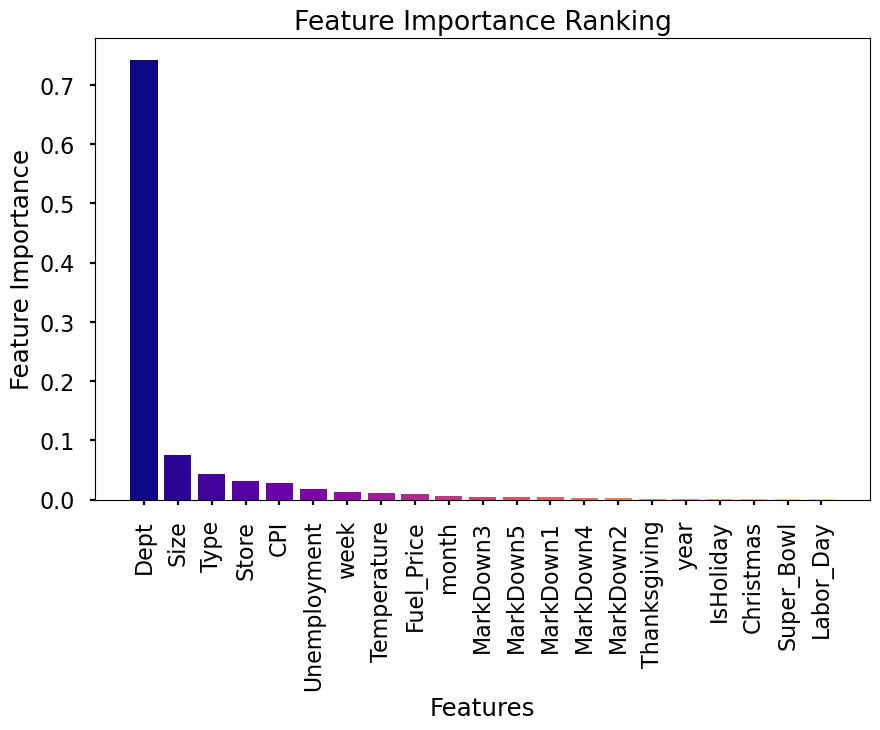

Feature Ranking:
1. Dept: 0.0312 (3.12%)
	Color: [0.050383 0.029803 0.527975 1.      ]
2. Size: 0.7431 (74.31%)
	Color: [0.16407  0.020171 0.577478 1.      ]
3. Type: 0.0009 (0.09%)
	Color: [0.254627 0.013882 0.615419 1.      ]
4. Store: 0.0111 (1.11%)
	Color: [0.337683 0.005618 0.643049 1.      ]
5. CPI: 0.0099 (0.99%)
	Color: [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
6. Unemployment: 0.0035 (0.35%)
	Color: [0.494877 0.01199  0.657865 1.      ]
7. week: 0.0024 (0.24%)
	Color: [0.562738 0.051545 0.641509 1.      ]
8. Temperature: 0.0045 (0.45%)
	Color: [0.631017 0.107699 0.608287 1.      ]
9. Fuel_Price: 0.0033 (0.33%)
	Color: [0.69284  0.165141 0.564522 1.      ]
10. month: 0.0040 (0.40%)
	Color: [0.748289 0.222711 0.516834 1.      ]
11. MarkDown3: 0.0280 (2.80%)
	Color: [0.798216 0.280197 0.469538 1.      ]
12. MarkDown5: 0.0170 (1.70%)
	Color: [0.840155 0.33358  0.427455 1.      ]
13. MarkDown1: 0.0438 (4.38%)
	Color: [0.881443 0.392529 0.383229 1.      ]
14. MarkDown4: 0.07

In [112]:
# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Get the list of feature names
feature_names = X_enc.columns.tolist()

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Sort feature names accordingly
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Define color gradient
colors = plt.cm.plasma(np.linspace(0, 1, len(feature_importances)))

# Plot feature importances with colors
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color=colors)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.show()

# List feature rankings with colors
print("Feature Ranking:")
for rank, (feature, importance, color) in enumerate(zip(sorted_feature_names, feature_importances, colors), 1):
    print(f"{rank}. {feature}: {importance:.4f} ({importance*100:.2f}%)")
    print(f"\tColor: {color}")

In [113]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [114]:
train_data_enc_new = df_encoded[:int(0.7*(len(df_encoded_new)))] # taking train part
test_data_enc_new = df_encoded[int(0.7*(len(df_encoded_new))):] # taking test part

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

In [115]:
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [116]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [117]:
wmae_test(y_test_enc1, y_pred_test_enc)

1801.5211888667177

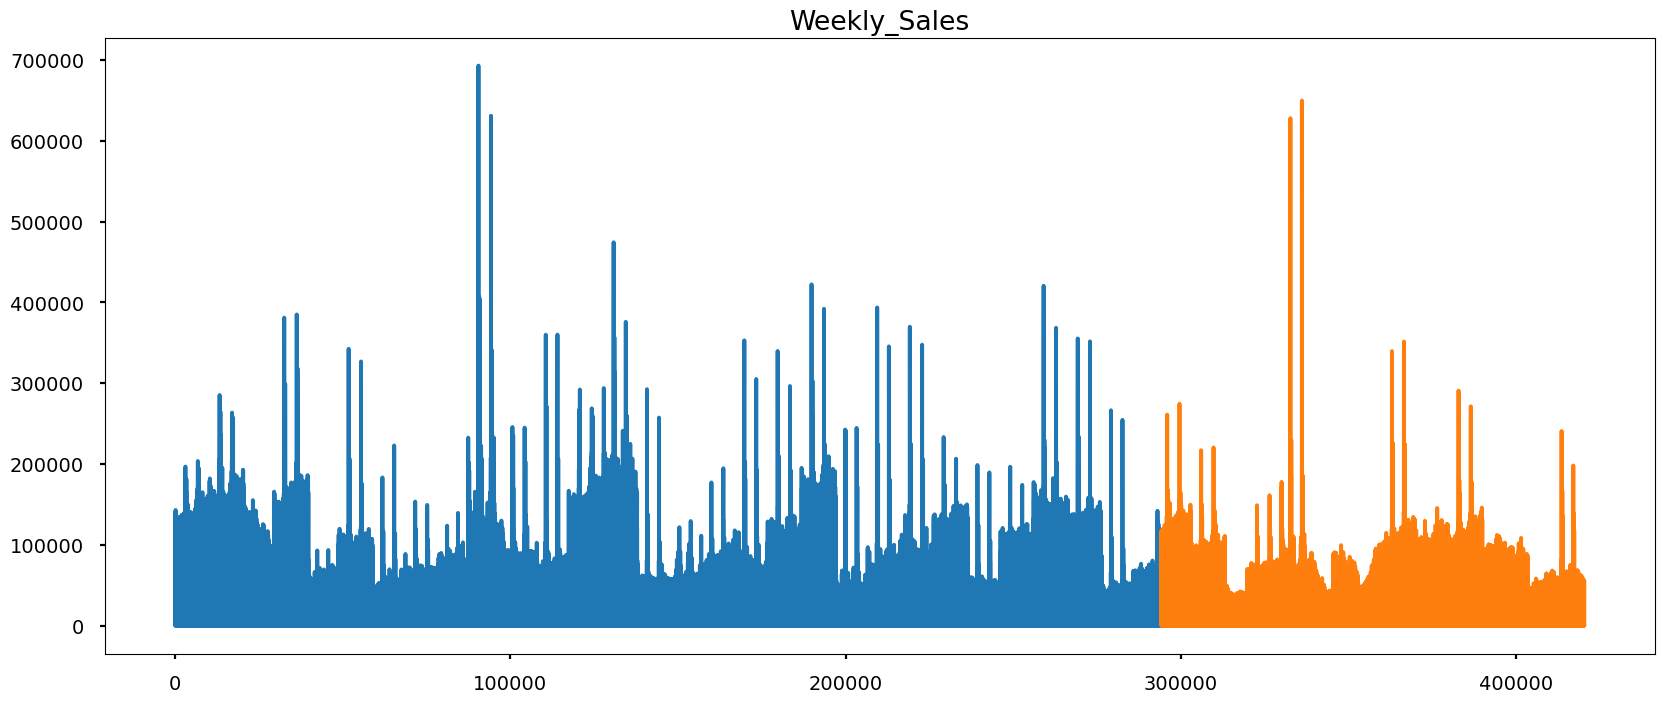

In [118]:
train_data_enc_new['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data_enc_new['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [119]:
# Hence we are able to cut down the error to roughly 9.5% using the whole dataset and tuning the hyperparameters

In [120]:
df_encoded_new2 = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new2.drop(drop_col, axis=1, inplace=True)

In [121]:
train_data_enc_new2 = df_encoded[:int(0.7*(len(df_encoded_new2)))] # taking train part
test_data_enc_new2 = df_encoded[int(0.7*(len(df_encoded_new2))):] # taking test part

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new2.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train_enc2 = train_data_enc_new2[used_cols3]
X_test_enc2 = test_data_enc_new2[used_cols3]
y_train_enc2 = train_data_enc_new2[target]
y_test_enc2 = test_data_enc_new2[target]

In [122]:
X_train_enc2 = X_train_enc2.drop(['Date'], axis=1)
X_test_enc2 = X_test_enc2.drop(['Date'], axis=1)

In [123]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [35, 40, 45],
    'randomforestregressor__max_features': ['sqrt', 'log2'],
    'randomforestregressor__min_samples_split': [10, 20]
}

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize the RobustScaler
scaler = RobustScaler()

# Create a pipeline
pipe = make_pipeline(scaler, rf)

# Initialize GridSearchCV with weighted MAE scorer
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_enc2, y_train_enc2)

# Get the best parameters and best score
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Predictions on train set
y_pred_enc = grid_search.predict(X_train_enc2)

# Predictions on test set
y_pred_test_enc = grid_search.predict(X_test_enc2)

wmae_test(y_test_enc1, y_pred_test_enc)

Best Parameters: {'randomforestregressor__max_depth': 35, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 100}


1883.5842989850978

In [124]:
!pip install Jinja2
data_results = {
    "Model": ['RandomForestRegressor', 'RandomForestRegressor', 'RandomForestRegressor', 'RandomForestRegressor', 'RandomForestRegressor'],
    "Info": ['without divided holiday columns', 'without month column', 'whole data', 'whole data with feature selection', 'whole data with grid search'],
    "WMAE": [5850, 5494, 2450, 1801, 1883]
}
pred_results = pd.DataFrame(data_results)
def left_align(data_results):
    return data_results.style.set_properties(**{'text-align': 'left'})
left_align(pred_results)

/bin/bash: /glob/intel-python/python2/bin/pip: /glob/intel-python/versions/2018u2/intelpython2/bin/python: bad interpreter: No such file or directory


,Model,Info,WMAE
0,RandomForestRegressor,without divided holiday columns,5850
1,RandomForestRegressor,without month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with grid search,1883


<font size="3"> Hence we can see that the best WMAE score we can achieve is 1801 for RF with whole data and feature selection.
Now lets make the data stationary for applying time series models
</font>

In [125]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [126]:
df.set_index('Date', inplace=True) #seting date as index

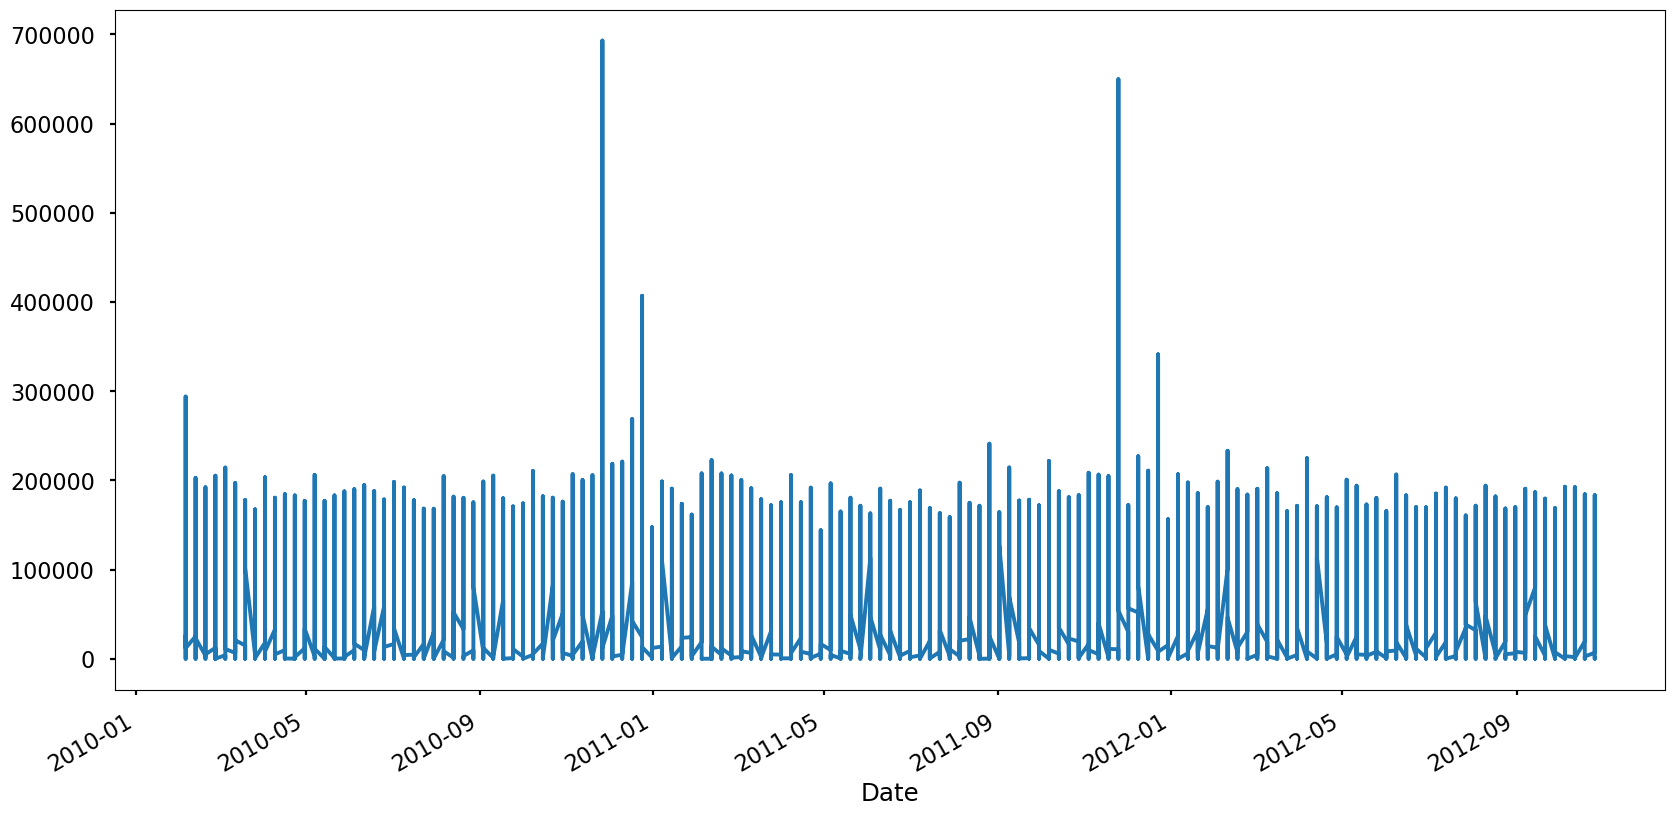

In [127]:
plt.figure(figsize=(20,10))
df['Weekly_Sales'].plot()
plt.show()

In [128]:
# Define the mapping
type_mapping = {'A': 1, 'B': 2, 'C': 3}

# Apply the mapping to the 'Type' column
df['Type'] = df['Type'].map(type_mapping)

In [129]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,False,False,False,False,5,2,2010
2010-02-05,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,False,False,False,False,5,2,2010
2010-02-05,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,False,False,False,False,5,2,2010
2010-02-05,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,False,False,False,False,5,2,2010
2010-02-05,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,False,False,False,False,5,2,2010


In [130]:
# List of columns to convert
columns_to_convert = ['IsHoliday', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']

# Convert False to 0 and True to 1 in specified columns
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [131]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010


In [132]:
df_week = df.resample('W').mean() #resample data as weekly

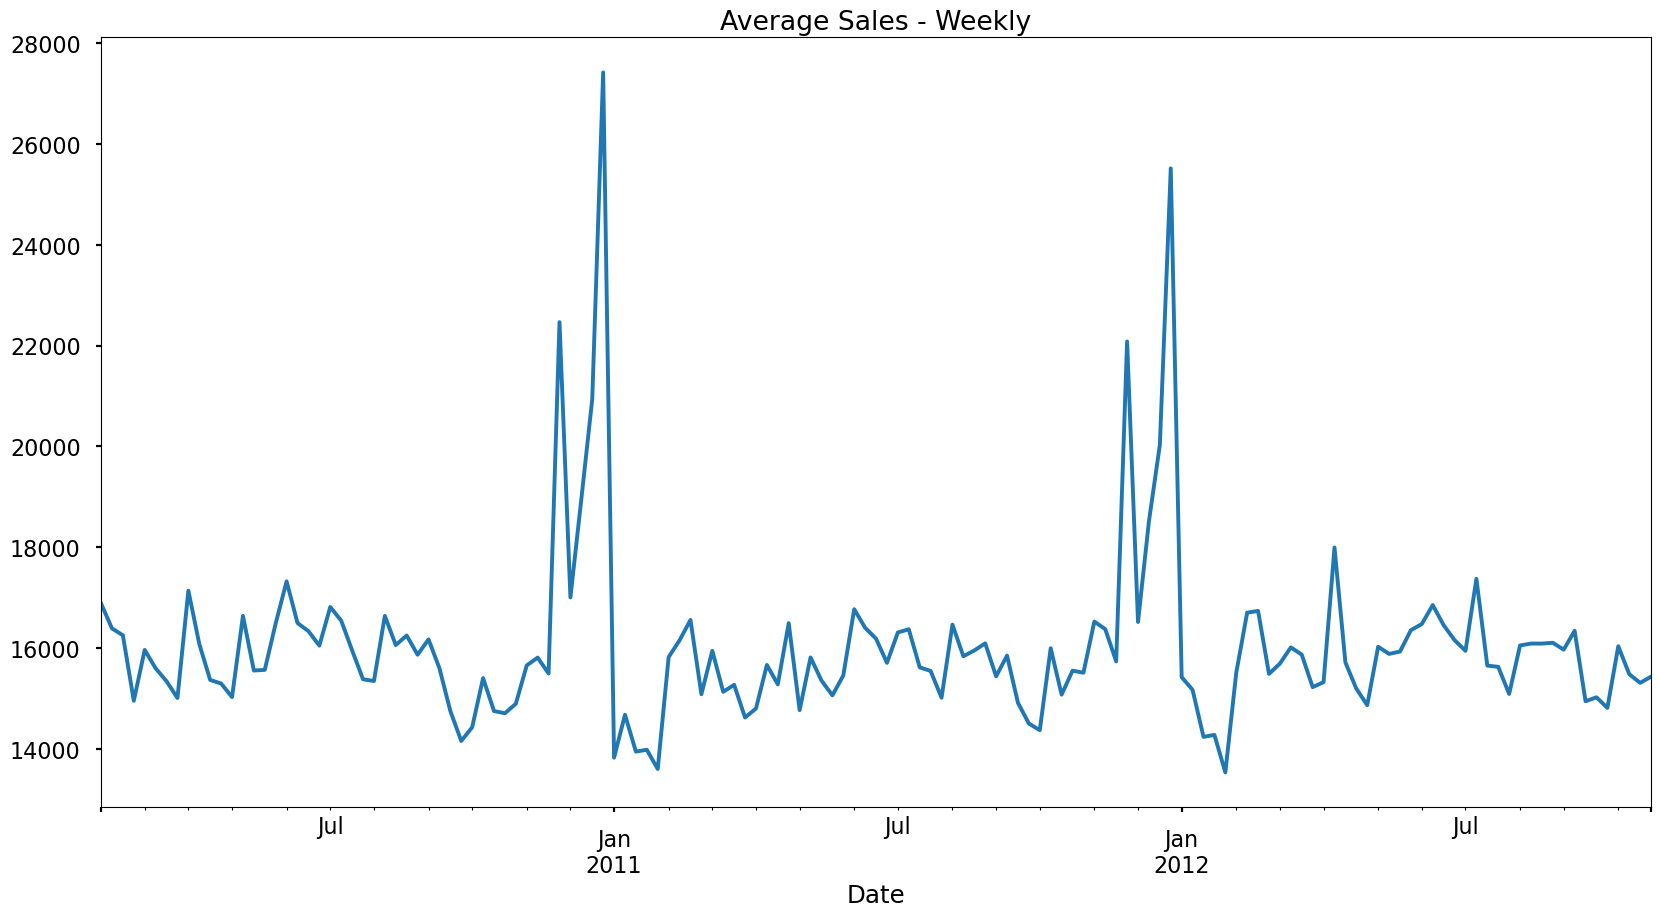

In [133]:
plt.figure(figsize=(20,10))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [134]:
df_month = df.resample('MS').mean() # resampling as monthly

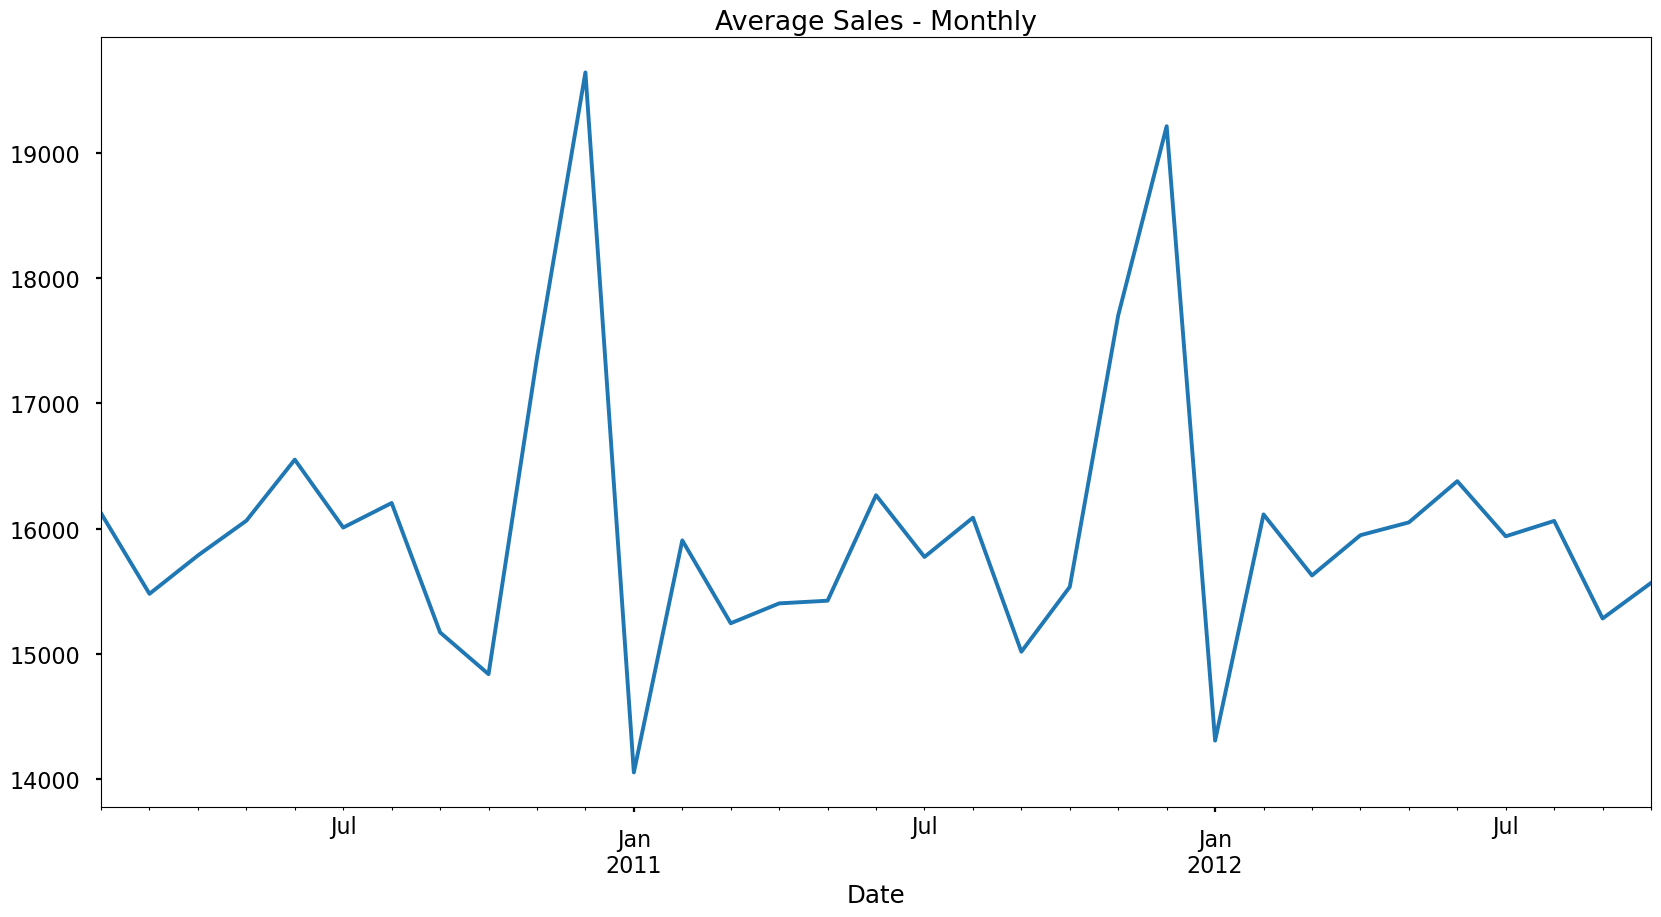

In [135]:
plt.figure(figsize=(20,10))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [136]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

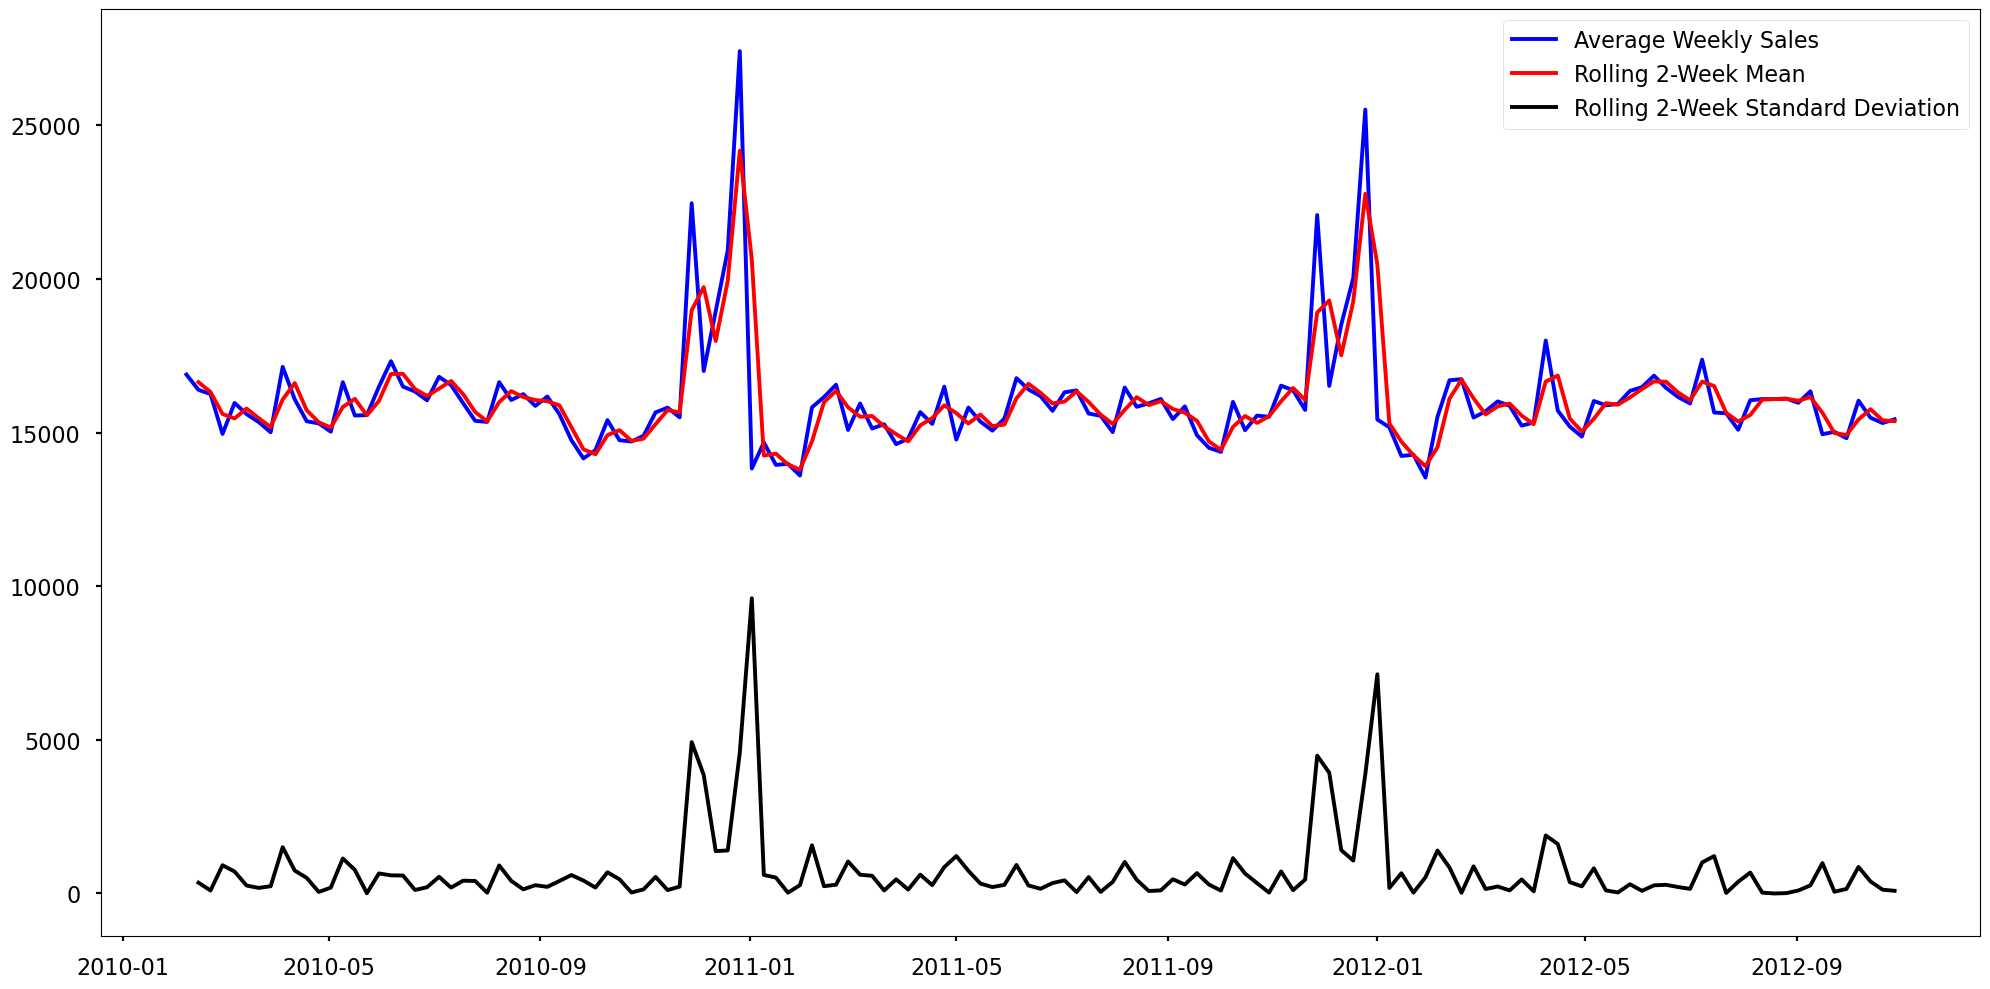

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [138]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

In [139]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 22)
Test: (43, 22)


In [140]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

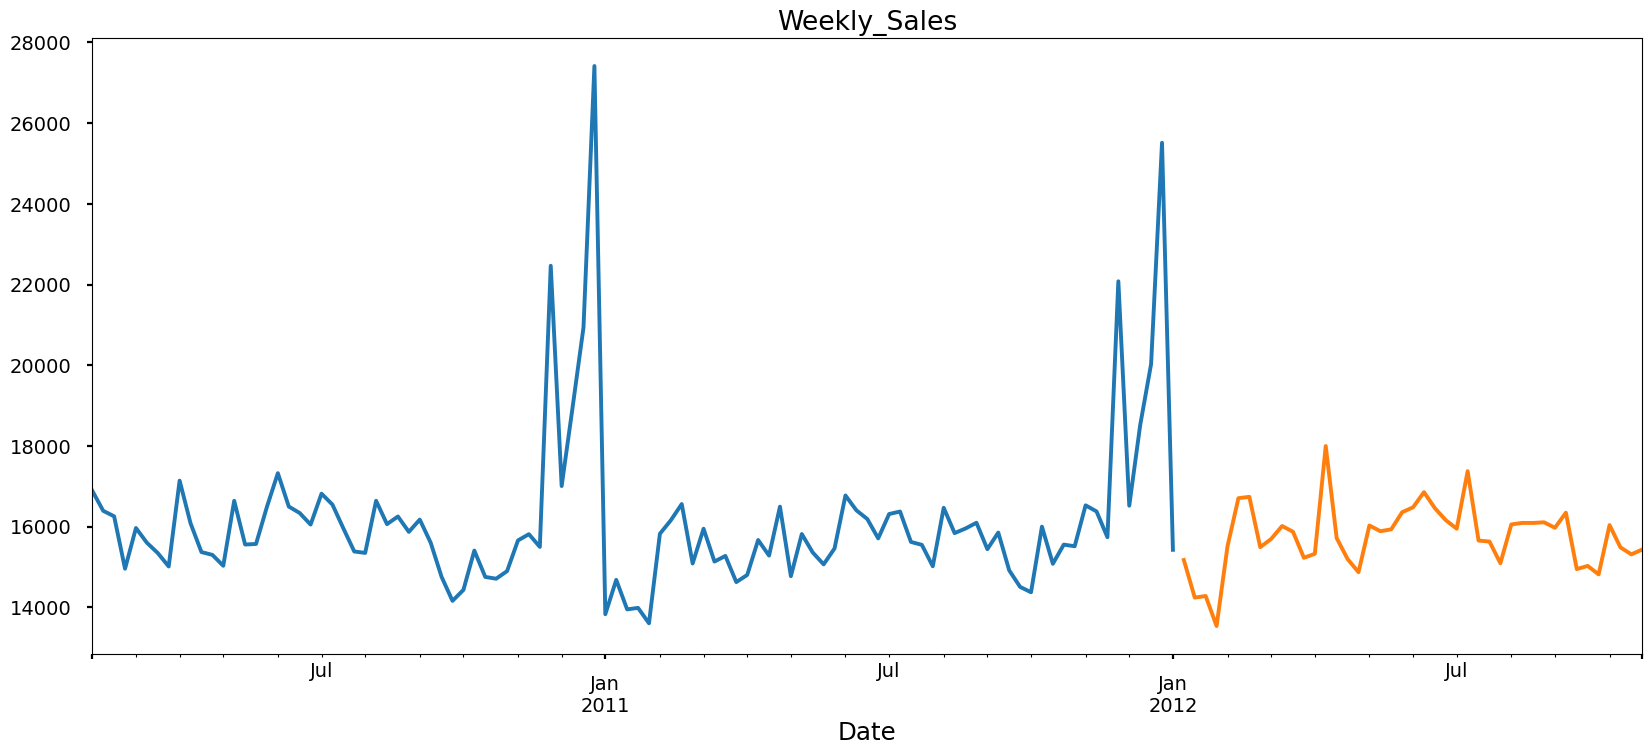

In [141]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [142]:
#Decomposing weekly data to observe seasonality

In [143]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

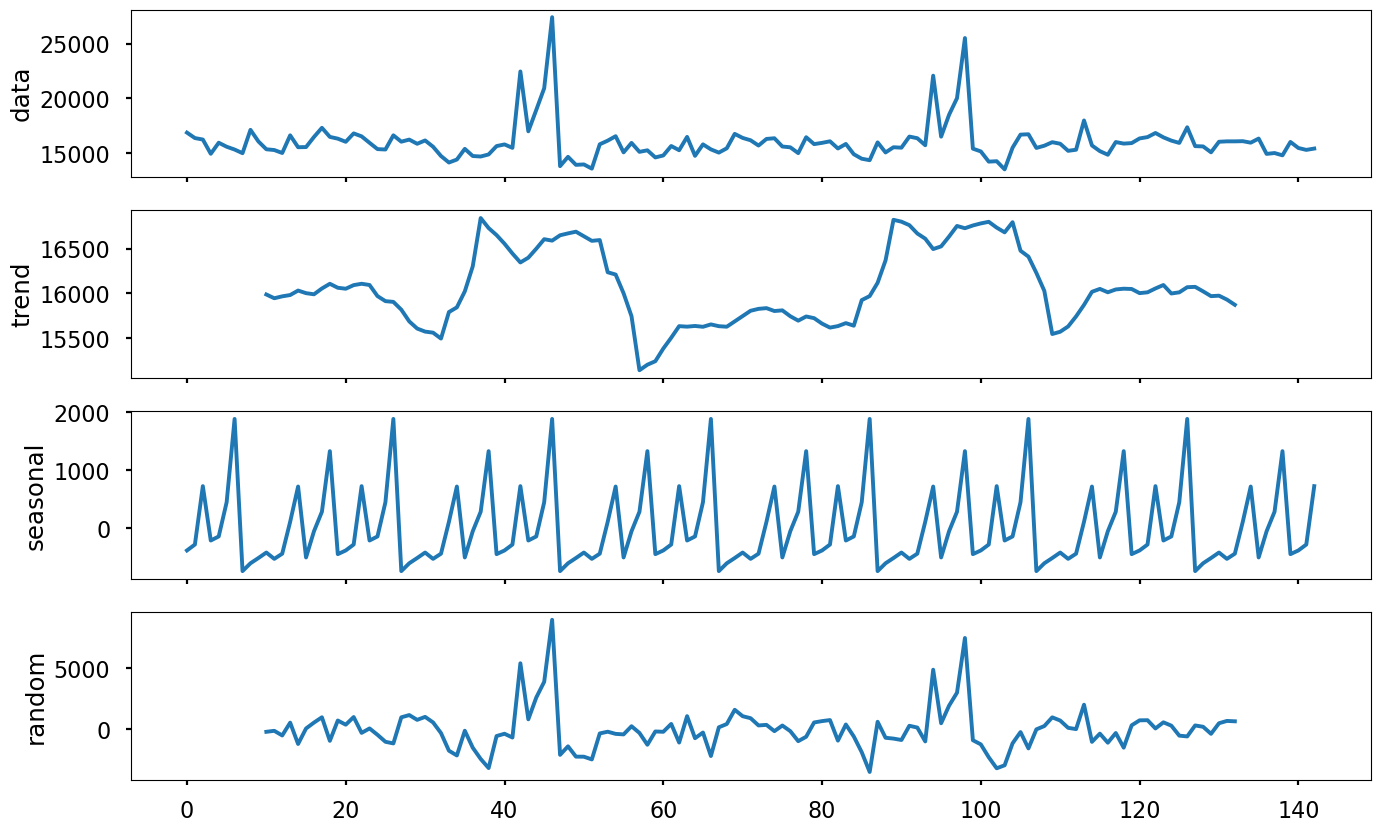

In [144]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

# 1.Differencing the data

In [145]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [146]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

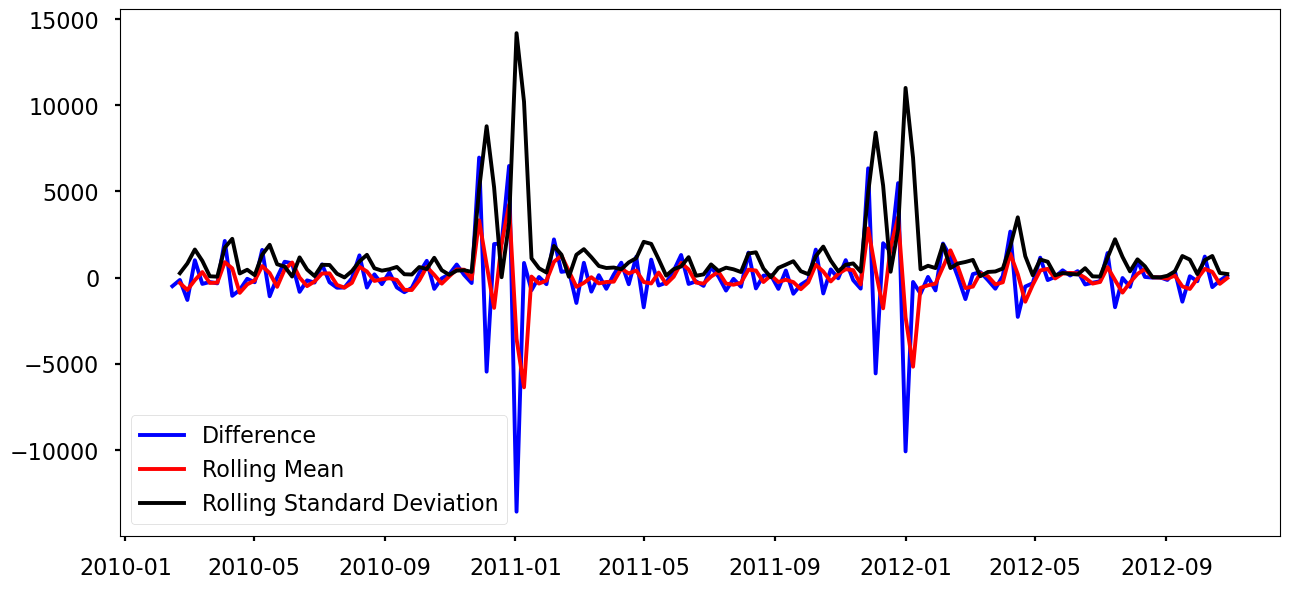

In [147]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 2.Shifting the data

In [148]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [149]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

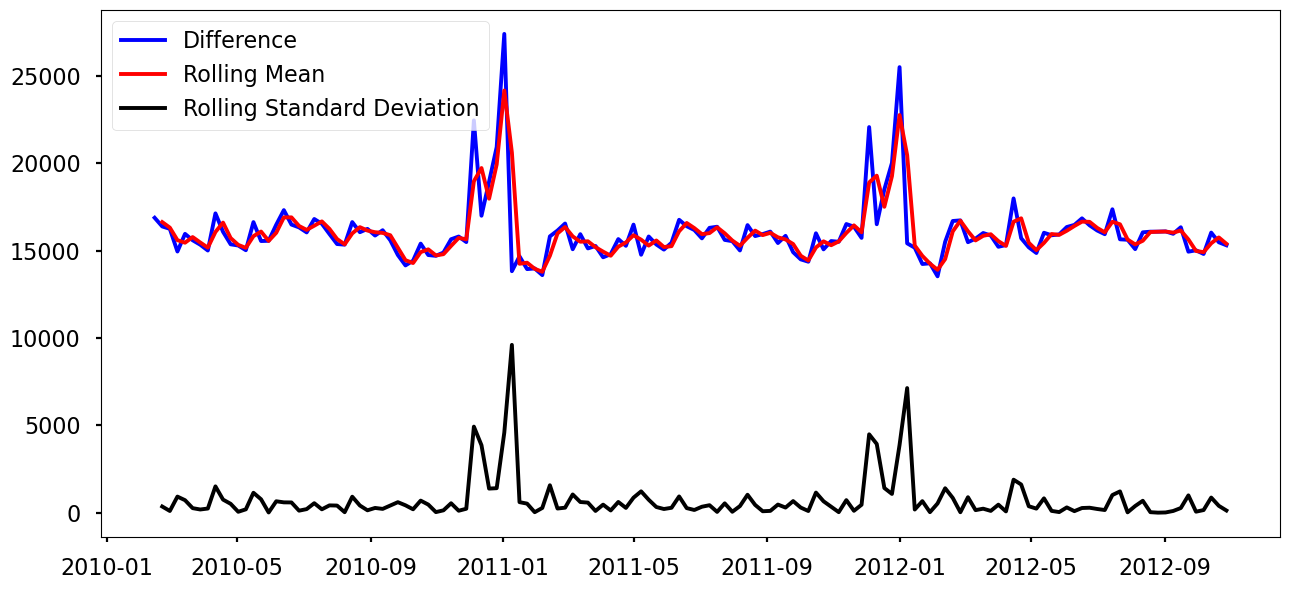

In [150]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 3.Log the data

In [151]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [152]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

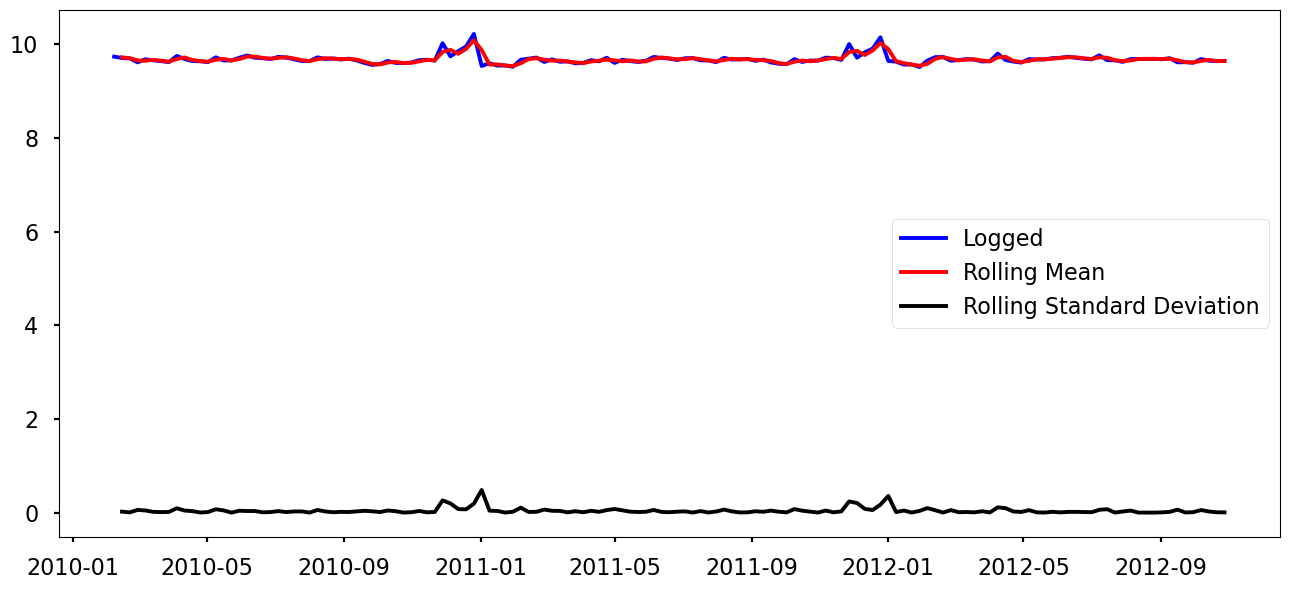

In [153]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 4.Combining the 3

In [154]:
# Combined transformation (difference, log, shift)
combined_data = np.log1p(df_week['Weekly_Sales'].diff().shift()).dropna()

# Rolling mean and standard deviation for combined data
combined_roll_mean = combined_data.rolling(window=2, center=False).mean()
combined_roll_std = combined_data.rolling(window=2, center=False).std()

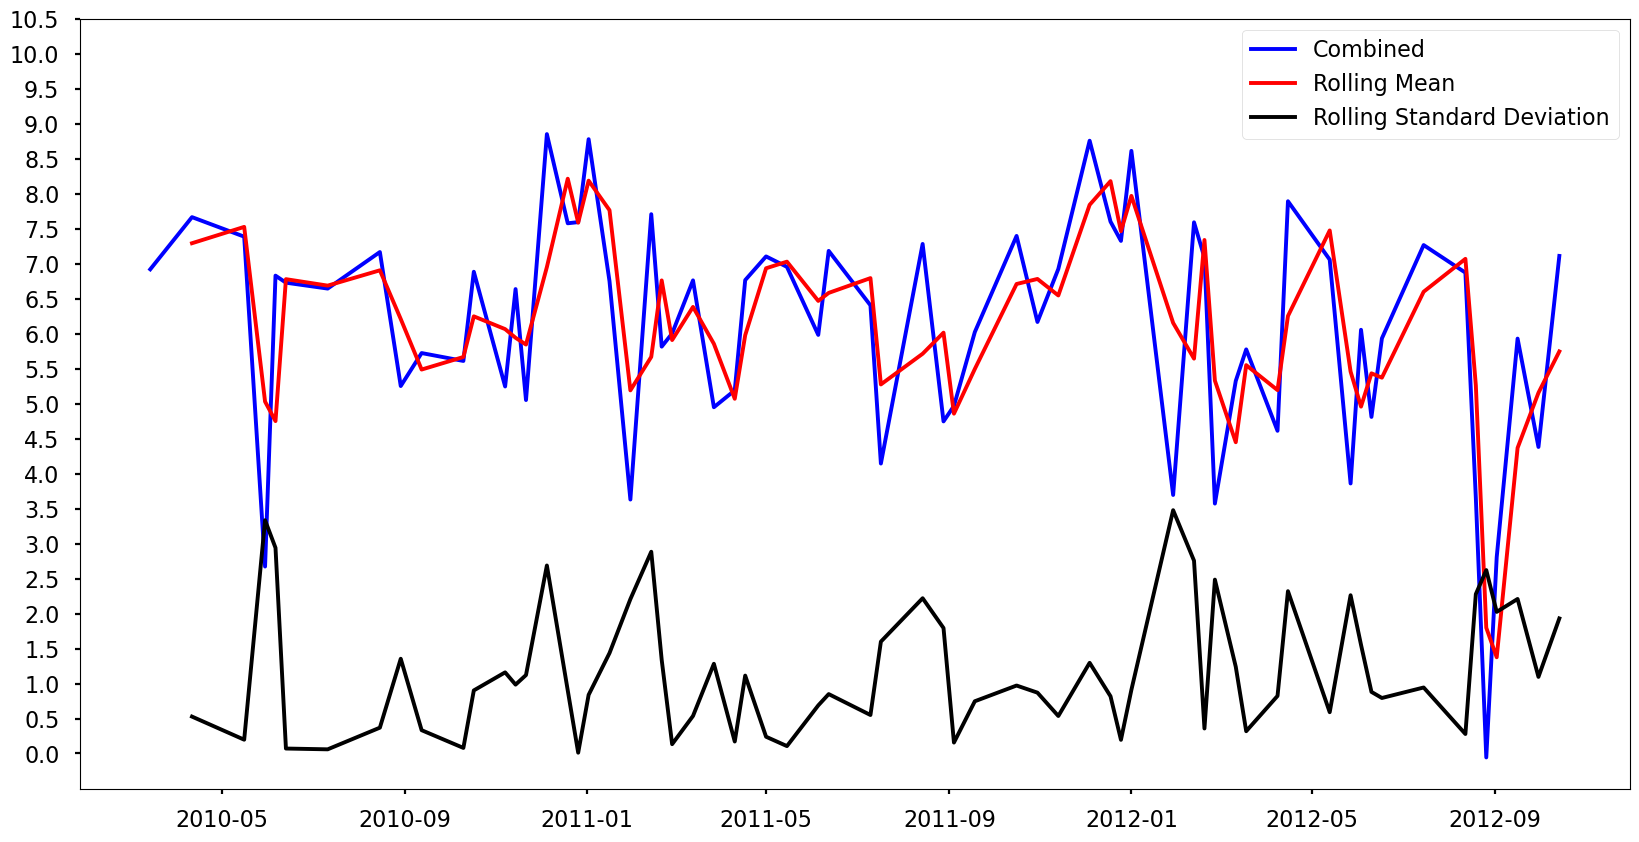

In [155]:
# Increase the length of the y-axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data
ax.plot(combined_data, color='blue', label='Combined')
ax.plot(combined_roll_mean, color='red', label='Rolling Mean')
ax.plot(combined_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()

# Compute the maximum value of the y-axis
ymax = max(combined_data.max(), combined_roll_mean.max(), combined_roll_std.max())

# Set y-axis ticks to be in steps of 0.5
yticks = np.arange(0, ymax * 1.2, 0.5)
ax.set_yticks(yticks)

# Show plot
plt.show()


<font size="3">Hence we can see that combining all 3 leads to the worst results by making the model too sensitive to outliers and hence ruining the trends (overfitting).
The best application seems to be for the differenced data hence lets proceed with it
</font>

# Auto-ARIMA Model

In [156]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [157]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200, information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10, error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

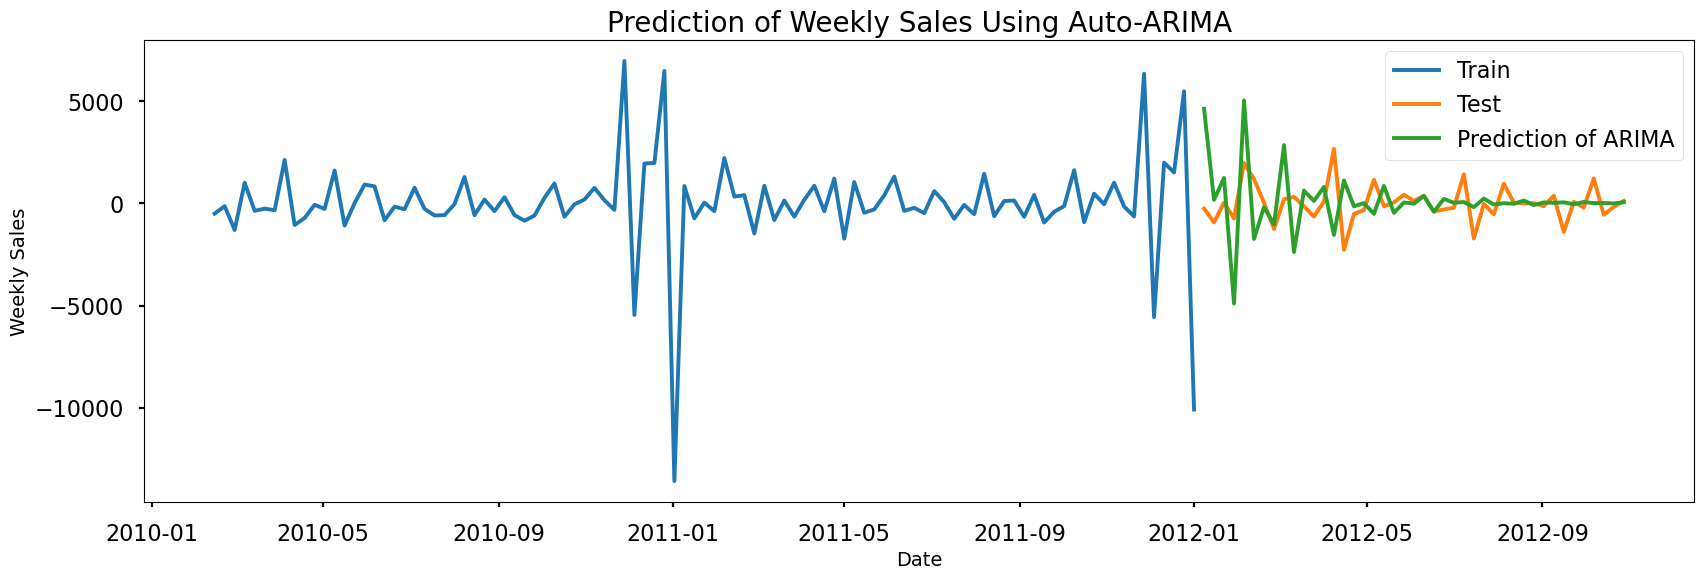

In [158]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [159]:
wmae_test(test_data_diff, y_pred)

2012-01-08 00:00:00    0.0
2012-01-15 00:00:00    0.0
2012-01-22 00:00:00    0.0
2012-01-29 00:00:00    0.0
2012-02-05 00:00:00    0.0
2012-02-12 00:00:00    0.0
2012-02-19 00:00:00    0.0
2012-02-26 00:00:00    0.0
2012-03-04 00:00:00    0.0
2012-03-11 00:00:00    0.0
2012-03-18 00:00:00    0.0
2012-03-25 00:00:00    0.0
2012-04-01 00:00:00    0.0
2012-04-08 00:00:00    0.0
2012-04-15 00:00:00    0.0
2012-04-22 00:00:00    0.0
2012-04-29 00:00:00    0.0
2012-05-06 00:00:00    0.0
2012-05-13 00:00:00    0.0
2012-05-20 00:00:00    0.0
2012-05-27 00:00:00    0.0
2012-06-03 00:00:00    0.0
2012-06-10 00:00:00    0.0
2012-06-17 00:00:00    0.0
2012-06-24 00:00:00    0.0
2012-07-01 00:00:00    0.0
2012-07-08 00:00:00    0.0
2012-07-15 00:00:00    0.0
2012-07-22 00:00:00    0.0
2012-07-29 00:00:00    0.0
2012-08-05 00:00:00    0.0
2012-08-12 00:00:00    0.0
2012-08-19 00:00:00    0.0
2012-08-26 00:00:00    0.0
2012-09-02 00:00:00    0.0
2012-09-09 00:00:00    0.0
2012-09-16 00:00:00    0.0
2

<font size="3">The prediction graph doesnt seem to be accurate enough hence we can try to apply another model.
    
    
</font>

# Exponential Smoothing

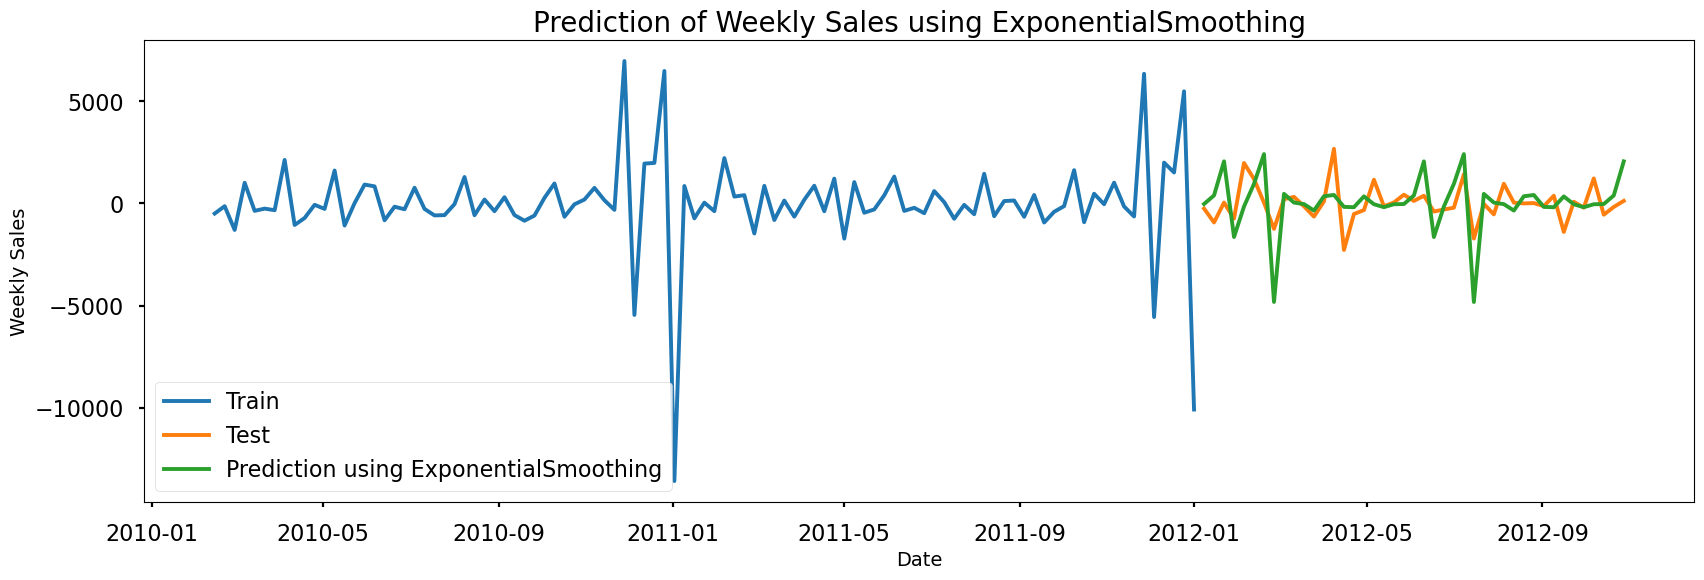

In [160]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive', trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [161]:
wmae_test(test_data_diff, y_pred)

840.6810609666959

In [162]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

used_cols = [c for c in df_week.columns.to_list() if c not in [target]]

# Extract features and target variable from training and test data
X_train = train_data_diff.drop(columns=['used_cols'])  # Assuming 'target_column' is the name of the target variable
y_train = train_data_diff['Weekly_Sales']
X_test = test_data_diff.drop(columns=['used_cols'])
y_test = test_data_diff['Weekly_Sales']

# Instantiate XGBoost regressor with default hyperparameters
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


KeyError: 'Weekly_Sales'